In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
import ast
import radon
import networkx as nx
from textwrap import wrap
# import counter
from collections import Counter

In [8]:
def plot_ast(code, ax):
    """Plots the AST of a given Python code snippet on the provided axes."""
    tree = ast.parse(code)
    graph = ast_to_networkx(tree)
    try:
        pos = nx.nx_agraph.graphviz_layout(graph, prog='dot')
    except ImportError:
        pos = nx.nx_pydot.graphviz_layout(graph, prog='dot')
    labels = {node: graph.nodes[node]['label'] for node in graph.nodes}
    nx.draw(
        graph,
        pos,
        labels=labels,
        with_labels=True,
        node_size=1000,
        font_size=10,
        font_weight="bold",
        node_color="lightgreen",
        arrowsize=5,
        ax=ax
    )
    # Add the code as wrapped text on top of the plot
    # wrapped_code = '\n'.join(wrap(code, width=50))  # Adjust width as needed
    # ax.text(0.5, 0.8, wrapped_code, ha='center', va='bottom', 
    #         transform=ax.transAxes, fontsize=8, color='black')

def ast_to_networkx(tree):
    """Converts an AST to a NetworkX directed graph with labeled nodes."""
    graph = nx.DiGraph()

    def add_nodes_edges(node, parent=None):
        node_id = id(node)
        graph.add_node(node_id, label=type(node).__name__)
        if parent is not None:
            graph.add_edge(parent, node_id)
        for _, value in ast.iter_fields(node):
            if isinstance(value, list):
                for item in value:
                    if isinstance(item, ast.AST):
                        add_nodes_edges(item, node_id)
            elif isinstance(value, ast.AST):
                add_nodes_edges(value, node_id)

    add_nodes_edges(tree)
    return graph

def is_compilable(code):
    """Checks if the given code can be compiled without syntax errors."""
    try:
        compile(code, '<string>', 'exec')
        return True
    except SyntaxError:
        return False
    except Exception as e:
        print(f"Error compiling code: {e}")
        return False

In [ ]:
# Me: [434, 547, 1949, 760, 586]
# You: [568,683, 2135,2171] (edited) 

# Me: [434, 547, 1949, 760, 586]
# You: [568,683, 2135,2171] (edited) 

## AI Feedback Manual Analysis

DataFrame using read_csv:


/var/folders/r1/m4nfmprd4t3gb__ypztwq0j80000gn/T/ipykernel_56664/3460879768.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_1_ai_feedback['Timestamp'] = pd.to_datetime(student_1_ai_feedback['Timestamp'])


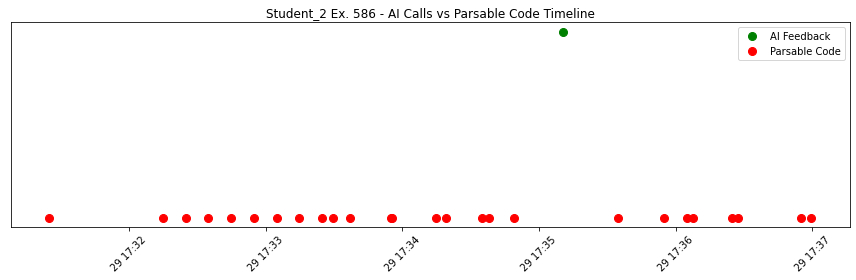

In [12]:
std_id = "Student_2" # Example ID
ex_id = 586
survey_ex = [434, 547,568,586,683, 760, 1949, 2135,2171]
student_encoding_df = pd.read_csv("./dataset/student_encoding.csv")
student_encoding_dict = student_encoding_df.set_index('Student ID').T.to_dict('records')[0]
user_encryption_df = pd.read_csv('./dataset/user_encryptions.csv', sep=';')
user_encryption_dict = user_encryption_df.set_index('id').T.to_dict('records')[1]
executed_codes_df = pd.read_csv("./filtered_events_df/execute_code_events.csv")
saved_codes_df = pd.read_csv("./filtered_events_df/save_code_events.csv")
submitted_codes_df = pd.read_csv("./filtered_events_df/submit_code_events.csv")
temporal_codes_df = pd.concat([executed_codes_df, saved_codes_df, submitted_codes_df], ignore_index=True)
# temporal_codes_df["Student ID"] = temporal_codes_df["Student ID"].map(student_encoding_dict)
temporal_codes_df = temporal_codes_df.dropna(subset=['Inserted Text'])

# Get the temporal codes for std_id and ex_id
indexes_to_drop = [118038, 241905, 241906, 241907, 241908, 241909, 348968, 348969, 348970, 348971, 348976, 348977, 348978, 348979, 348951, 348952, 348953, 348954, 348955, 348956, 348957, 348958, 348959, 348960, 348961, 348962, 348963, 349185, 349186, 349187, 349188, 349189, 348964, 348965, 348966, 348967, 348972, 348973, 348974, 348975, 349075, 349076, 349077, 349078, 348994, 348995, 348996, 348997, 348998, 348999, 349000, 349001, 349002, 349003, 349004, 349005, 349006, 349007, 349008, 349009, 349010, 349011, 349012, 349013, 349014, 349015, 349016, 349017, 349018, 349019, 349020, 349021, 349022, 349023, 349024, 349025, 349026, 349027, 349028, 349029, 349030, 349031, 349032, 349033, 349034, 349035, 349036, 349037, 349038, 349039, 349040, 349041, 349042, 349043, 349044, 349045, 349046, 349047, 349048, 349049, 349050, 349051, 349052, 349053, 349054, 349055, 349056, 349057, 349058, 349059, 349060, 349061, 349062, 349063, 349064, 349065, 349066, 349067, 349068, 349069, 349070, 349071, 349072, 349073, 349074, 349079, 349080, 349081, 349082, 349083, 349084, 349085, 349086, 349087, 349088, 349089, 349090, 349091, 349092, 349093, 349094, 349095, 349096, 349097, 349098, 349099, 349100, 349101, 349102, 349103, 349104, 349105, 349106, 349107, 349108, 349109, 349110, 349111, 349112, 349113, 349114, 349115, 349116, 349117, 349118, 349119, 349120, 349121, 349122, 349123, 349124, 349125, 349126, 349127, 349128, 349129, 349130, 349131, 349132, 349133, 349134, 349135, 349136, 349137, 349138, 349139, 349140, 349141, 349142, 349143, 349144, 349145, 349146, 349147, 349148, 349149, 349150, 349151, 349152, 349153, 349154, 349155, 349156, 349157, 349158, 349159, 349160, 349161, 349162, 349163, 349164, 349165, 349166, 348980, 348981, 348982, 348983, 348984, 348985, 348986, 348987, 348988, 348989, 348990, 348991, 348992, 348993, 349167, 349168, 349169, 349170, 348941, 348942, 348943, 348944, 348945, 349171, 349172, 349173, 349174, 349175, 349176, 348946, 348947, 348948, 348949, 348950, 349177, 349178, 349179, 349180, 349181, 349182, 349183, 349184]
temporal_codes_df = temporal_codes_df.drop(indexes_to_drop, errors='ignore')
temporal_codes_df = temporal_codes_df.sort_values(by=['Timestamp'])
temporal_codes_df = temporal_codes_df[temporal_codes_df["Exercise ID"].isin(survey_ex)]
temporal_codes_df["Exercise ID"].unique()

student_1_temporal_codes_df = temporal_codes_df[(temporal_codes_df["Student ID"] == std_id) & (temporal_codes_df["Exercise ID"] == ex_id)]
student_1_codes = temporal_codes_df[(temporal_codes_df["Student ID"] == std_id) & (temporal_codes_df["Exercise ID"] == ex_id)]["Inserted Text"]

# Get the AI feedback calls for std_id and ex_id
ai_feedback_events_df = pd.read_csv("./filtered_events_df/ai_feedback_events.csv")
ai_feedback_events_df["Student ID"] = ai_feedback_events_df["Student ID"].map(student_encoding_dict)
reverse_student_encoding_dict = {v: k for k, v in student_encoding_dict.items()}
ai_feedback_events_df["Student ID"] = ai_feedback_events_df["Student ID"].map(reverse_student_encoding_dict)
ai_feedback_events_df = ai_feedback_events_df.sort_values(by=['Timestamp'])
student_1_ai_feedback = ai_feedback_events_df[(ai_feedback_events_df["Student ID"] == std_id) & (ai_feedback_events_df["Exercise ID"] == ex_id)]

parsable_codes = []
parsable_temp_codes = pd.DataFrame(columns=student_1_temporal_codes_df.columns)
for i, code in enumerate(student_1_codes):
    try: #print(ast.dump(ast.parse(student_1_codes[8])))
        # parsable_code = ast.parse(code)
        parsable_codes.append(code)
        parsable_temp_codes = pd.concat([parsable_temp_codes, student_1_temporal_codes_df.iloc[i].to_frame().T])
        # print(f"Parsable at: {i}")
        # print(code)
        # print("---------------------------------------------------")
    except:
        print(f"Not parsable at: {i}")
        continue

parsable_temp_codes['Timestamp'] = pd.to_datetime(parsable_temp_codes['Timestamp'])

# Method 1: Using read_csv with tab separator specified
ai_feedack_calls_df = pd.read_csv('./dataset/ai_feedback_tabs.txt', sep='\t')
ai_feedack_calls_df["userId"] = ai_feedack_calls_df["userId"].map(user_encryption_dict)
# switch keys with values in student_encoding_dict and map the ai_feedack_calls_df["userId"] to the new dict
# Map the userId in ai_feedack_calls_df to the new student_encoding_dict
ai_feedack_calls_df["userId"] = ai_feedack_calls_df["userId"].map(reverse_student_encoding_dict)
# Print the first few rows of the DataFrame
print("DataFrame using read_csv:")
ai_feedack_calls_df.head()

ai_feedack_calls_df['timestamp'] = pd.to_datetime(ai_feedack_calls_df['timestamp'])
student_1_ai_feedback['Timestamp'] = pd.to_datetime(student_1_ai_feedback['Timestamp'])

# I have the ai feedback calls in ar_feedback_calls_df, i need to pick the ones that have the same or very close time stamp to student_1_ai_feedback
st1_ai_feedback_calls = pd.DataFrame(columns=ai_feedack_calls_df.columns)

for i, ai_feedback in student_1_ai_feedback.iterrows():
    row = ai_feedack_calls_df.loc[abs(ai_feedack_calls_df['timestamp'] - ai_feedback['Timestamp']).idxmin()]
    # Use concat to add the row to the dataframe
    st1_ai_feedback_calls = pd.concat([st1_ai_feedback_calls, row.to_frame().T])


# Plot a dot for the timestamps where ai was called (green) and where there's a parsable code (red). seperate them aboce and below. Also rotate the x-axis label
fig, ax = plt.subplots(figsize=(12, 4))

# Convert timestamps to datetime objects first
ai_times = [pd.to_datetime(ts) for ts in student_1_ai_feedback.Timestamp]
parsable_times = [pd.to_datetime(ts) for ts in parsable_temp_codes['Timestamp']]

# Plot AI calls above (y=0.1) in green
ax.plot(ai_times, 
        0.1 * np.ones(len(ai_times)),  # Use length instead of array-like
        'o', color='g', markersize=8, label='AI Feedback')

# Plot parsable code below (y=-0.1) in red
ax.plot(parsable_times, 
        -0.1 * np.ones(len(parsable_times)),
        'o', color='r', markersize=8, label='Parsable Code')

# Formatting
ax.set_yticks([])  # Remove y-axis ticks
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper right')

ax.set_title(f'{std_id} Ex. {ex_id} - AI Calls vs Parsable Code Timeline')

plt.tight_layout()
plt.show()

In [6]:
# Time difference in seconds between first AI feedback call and first parsable code
first_ai_time = student_1_ai_feedback['Timestamp'].iloc[0]
first_parsable_time = parsable_temp_codes['Timestamp'].iloc[0]
time_difference = (first_parsable_time - first_ai_time).total_seconds()

print(f"Time difference in seconds between first AI feedback call and first parsable code: {time_difference} seconds")
print(f"First AI feedback call time: {first_ai_time}")
print(f"First parsable code time: {first_parsable_time}")


Time difference in seconds between first AI feedback call and first parsable code: -288.123001 seconds
First AI feedback call time: 2024-10-29 16:58:48.571000099
First parsable code time: 2024-10-29 16:54:00.447999954


In [ ]:
import pandas as pd

# Ensure timestamps are datetime
parsable_temp_codes['Timestamp'] = pd.to_datetime(parsable_temp_codes['Timestamp'])
st1_ai_feedback_calls['timestamp'] = pd.to_datetime(st1_ai_feedback_calls['timestamp'])

results = []

# Iterate through all AI feedback calls
for _, ai_call in st1_ai_feedback_calls.iterrows():
    ai_time = ai_call['timestamp']
    ai_code_sent = ai_call['code_latest_snapshot']
    
    # Prepare dictionary to store results for this AI call
    result_entry = {
        'ai_feedback_call': ai_call,
        'ai_code_sent': ai_code_sent,
    }
    
    # Check for each time delta
    for delta in [30, 60, 120]:
        target_time = ai_time + pd.Timedelta(seconds=delta)
        
        # Get all codes after AI call (exclude exactly at ai_time)
        after_candidates = parsable_temp_codes[parsable_temp_codes['Timestamp'] > ai_time].copy()
        
        if after_candidates.empty:
            result_entry[f'code_{delta}s'] = None
            result_entry[f'time_diff_{delta}s'] = None
            continue
        
        # Calculate absolute time differences and if code is after target_time
        after_candidates['delta_abs'] = (after_candidates['Timestamp'] - target_time).abs()
        after_candidates['is_after'] = (after_candidates['Timestamp'] >= target_time)
        
        # Sort by closest absolute difference, preferring codes after target_time
        after_candidates_sorted = after_candidates.sort_values(
            by=['delta_abs', 'is_after'],
            ascending=[True, False]  # False for is_after to have True (1) first
        )
        
        # Get the closest code
        closest_code = after_candidates_sorted.iloc[0]
        
        # Calculate time difference from AI call
        time_diff = (closest_code['Timestamp'] - ai_time).total_seconds()
        
        result_entry[f'code_{delta}s'] = closest_code['Inserted Text']
        result_entry[f'time_diff_{delta}s'] = time_diff
    
    results.append(result_entry)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
index = 0
for feedback in results_df.iterrows():
    path = "./Manual AI Feedback Assessment/"
    file_name = f"Student {std_id.split('_')[1]} Exercise {ex_id} Feedback {index}.txt"
    # Print details for the first AI call
    if not results_df.empty:
        with open(os.path.join(path, file_name), 'w') as f:
            first_result = results_df.iloc[index]
            print("\n\n~~~~~CODE SENT TO AI~~~~~:\n", first_result['ai_code_sent'])
            print("\n\n~~~~~AI FEEDBACK CALL~~~~~:\n", first_result['ai_feedback_call']['feedback'])
            print()
            # Append to a txt file
            
            f.write(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~CODE SENT TO AI~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~:\n {first_result['ai_code_sent']}\n\n")
            f.write(f"\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~AI FEEDBACK CALL~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~:\n {first_result['ai_feedback_call']['feedback']}\n\n")
            for delta in [30, 60, 120]:
                code = first_result[f'code_{delta}s']
                time_diff = first_result[f'time_diff_{delta}s']
                print(f"\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~CODE {delta} Sec AFTER~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
                f.write(f"\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~CODE {delta} Sec AFTER~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
                # Append to a txt file
                if pd.notnull(code):
                    print(f"\nTime Difference: {time_diff:.2f} seconds\n")
                    print(code)
                    # Write to a txt file
                    f.write(f"\nTime Difference: {time_diff:.2f} seconds\n")
                    f.write(code)
                else:
                    print("No code found")
        index += 1
    else:
        print("No AI feedback calls to process")



~~~~~CODE SENT TO AI~~~~~:
 # Write your python code here! No previous Code Found
def count_vowels(word):
    for letter in word:
        



~~~~~AI FEEDBACK CALL~~~~~:
 <p>It's great to see you working on this exercise! You're off to a solid start by defining the `count_vowels` function. However, it looks like your code is incomplete. Here are some steps to consider as you work on counting the vowels:</p>

<h3>Recommended Steps:</h3>
<ul>
    <li>Make sure to use a loop that iterates through each character in the `word` input.</li>
    <li>Check if each character is a vowel by comparing it against a string of vowels: 'aeiou'.</li>
    <li>Don't forget to convert the character to lowercase to ensure that the comparison is case-insensitive.</li>
    <li>Keep a count of the vowels you find and return this count at the end of your function.</li>
</ul>

<p>As you refine your function, think about the readability of your code. For instance, using descriptive variable names can significan

## Post AI Feedback AST Changes

### Preparing Dataframe

In [2]:
import pandas as pd

# Load and prepare the data
student_encoding_df = pd.read_csv("./dataset/student_encoding.csv")
student_encoding_dict = student_encoding_df.set_index('Student ID').T.to_dict('records')[0]
reverse_student_encoding_dict = {v: k for k, v in student_encoding_dict.items()}
user_encryption_df = pd.read_csv('./dataset/user_encryptions.csv', sep=';')
user_encryption_dict = user_encryption_df.set_index('id').T.to_dict('records')[1]

# Load AI feedback calls and fix userId
ai_feedback_calls_df = pd.read_csv('./dataset/ai_feedback_tabs.txt', sep='\t')
# Map userId from encrypted to original format
ai_feedback_calls_df["userId"] = ai_feedback_calls_df["userId"].map(user_encryption_dict)
ai_feedback_calls_df["userId"] = ai_feedback_calls_df["userId"].map(reverse_student_encoding_dict)
# Convert timestamp
ai_feedback_calls_df['timestamp'] = pd.to_datetime(ai_feedback_calls_df['timestamp'])
userID = ['Student_1', 'Student_2', 'Student_3', 'Student_4',
       'Student_5', 'Student_6', 'Student_7', 'Student_8', 'Student_9',
       'Student_10', 'Student_11', 'Student_12', 'Student_13',
       'Student_16', 'Student_15', 'Student_14', 'Student_17',
       'Student_19']
ai_feedback_calls_df = ai_feedback_calls_df[ai_feedback_calls_df["userId"].isin(userID)]
display(ai_feedback_calls_df)


,id,userId,exercise_type,exercise_id,code_latest_snapshot,feedback,timestamp
237,238,Student_1,coding,586,# Write your python code here! No previous Cod...,<p>Great effort in attempting the problem! Let...,2024-10-29 16:58:48.314000
238,239,Student_1,coding,586,def count_vowels(w):\r\n word = w.lower()\r...,<p>Your code submission shows a good understan...,2024-10-29 17:01:08.307700
239,240,Student_1,coding,586,def count_vowels(w):\r\n word = w.lower()\r...,<p>Your code submission for counting vowels de...,2024-10-29 17:01:46.508200
240,241,Student_1,coding,683,def is_prime(num):\r\n if num <= 1: return ...,<p>Great effort on your submission! You’re off...,2024-10-29 17:21:25.061800
241,242,Student_1,coding,683,def is_prime(num):\r\n if num <= 1: return ...,<p>Your code submission shows a good understan...,2024-10-29 17:22:45.683700
...,...,...,...,...,...,...,...
637,638,Student_19,coding,547,# Write your python code here! No previous Cod...,<p>Your implementation of the `flatten_list` f...,2024-11-25 19:38:44.596000
638,639,Student_19,coding,2171,# Write your python code here! No previous Cod...,<p>Great job on taking the first step to creat...,2024-11-25 19:43:00.849000
639,640,Student_19,coding,1949,# Write your python code here! No previous Cod...,"<p>Your code submission shows a great start, b...",2024-11-25 19:46:13.470600
640,641,Student_19,coding,2135,# Write your python code here! No previous Cod...,<p>Great start on your `Timer` class implement...,2024-11-25 19:50:55.461900


In [3]:
ex_id = 586
survey_ex = [434, 547,568,586,683, 760, 1949, 2135,2171]
student_encoding_df = pd.read_csv("./dataset/student_encoding.csv")
student_encoding_dict = student_encoding_df.set_index('Student ID').T.to_dict('records')[0]
user_encryption_df = pd.read_csv('./dataset/user_encryptions.csv', sep=';')
user_encryption_dict = user_encryption_df.set_index('id').T.to_dict('records')[1]
executed_codes_df = pd.read_csv("./filtered_events_df/execute_code_events.csv")
saved_codes_df = pd.read_csv("./filtered_events_df/save_code_events.csv")
submitted_codes_df = pd.read_csv("./filtered_events_df/submit_code_events.csv")
temporal_codes_df = pd.concat([executed_codes_df, saved_codes_df, submitted_codes_df], ignore_index=True)
# temporal_codes_df["Student ID"] = temporal_codes_df["Student ID"].map(student_encoding_dict)
temporal_codes_df = temporal_codes_df.dropna(subset=['Inserted Text'])

# Get the temporal codes for ex_id
indexes_to_drop = [118038, 241905, 241906, 241907, 241908, 241909, 348968, 348969, 348970, 348971, 348976, 348977, 348978, 348979, 348951, 348952, 348953, 348954, 348955, 348956, 348957, 348958, 348959, 348960, 348961, 348962, 348963, 349185, 349186, 349187, 349188, 349189, 348964, 348965, 348966, 348967, 348972, 348973, 348974, 348975, 349075, 349076, 349077, 349078, 348994, 348995, 348996, 348997, 348998, 348999, 349000, 349001, 349002, 349003, 349004, 349005, 349006, 349007, 349008, 349009, 349010, 349011, 349012, 349013, 349014, 349015, 349016, 349017, 349018, 349019, 349020, 349021, 349022, 349023, 349024, 349025, 349026, 349027, 349028, 349029, 349030, 349031, 349032, 349033, 349034, 349035, 349036, 349037, 349038, 349039, 349040, 349041, 349042, 349043, 349044, 349045, 349046, 349047, 349048, 349049, 349050, 349051, 349052, 349053, 349054, 349055, 349056, 349057, 349058, 349059, 349060, 349061, 349062, 349063, 349064, 349065, 349066, 349067, 349068, 349069, 349070, 349071, 349072, 349073, 349074, 349079, 349080, 349081, 349082, 349083, 349084, 349085, 349086, 349087, 349088, 349089, 349090, 349091, 349092, 349093, 349094, 349095, 349096, 349097, 349098, 349099, 349100, 349101, 349102, 349103, 349104, 349105, 349106, 349107, 349108, 349109, 349110, 349111, 349112, 349113, 349114, 349115, 349116, 349117, 349118, 349119, 349120, 349121, 349122, 349123, 349124, 349125, 349126, 349127, 349128, 349129, 349130, 349131, 349132, 349133, 349134, 349135, 349136, 349137, 349138, 349139, 349140, 349141, 349142, 349143, 349144, 349145, 349146, 349147, 349148, 349149, 349150, 349151, 349152, 349153, 349154, 349155, 349156, 349157, 349158, 349159, 349160, 349161, 349162, 349163, 349164, 349165, 349166, 348980, 348981, 348982, 348983, 348984, 348985, 348986, 348987, 348988, 348989, 348990, 348991, 348992, 348993, 349167, 349168, 349169, 349170, 348941, 348942, 348943, 348944, 348945, 349171, 349172, 349173, 349174, 349175, 349176, 348946, 348947, 348948, 348949, 348950, 349177, 349178, 349179, 349180, 349181, 349182, 349183, 349184]
temporal_codes_df = temporal_codes_df.drop(indexes_to_drop, errors='ignore')
temporal_codes_df = temporal_codes_df.sort_values(by=['Timestamp'])
temporal_codes_df = temporal_codes_df[temporal_codes_df["Exercise ID"].isin(survey_ex)]
temporal_codes_df["Exercise ID"].unique()

student_1_temporal_codes_df = temporal_codes_df[(temporal_codes_df["Exercise ID"] == ex_id)]
student_1_codes = temporal_codes_df[(temporal_codes_df["Exercise ID"] == ex_id)]["Inserted Text"]

# Get the AI feedback calls for ex_id
ai_feedback_events_df = pd.read_csv("./filtered_events_df/ai_feedback_events.csv")
ai_feedback_events_df["Student ID"] = ai_feedback_events_df["Student ID"].map(student_encoding_dict)
reverse_student_encoding_dict = {v: k for k, v in student_encoding_dict.items()}
ai_feedback_events_df["Student ID"] = ai_feedback_events_df["Student ID"].map(reverse_student_encoding_dict)
ai_feedback_events_df = ai_feedback_events_df.sort_values(by=['Timestamp'])
student_1_ai_feedback = ai_feedback_events_df[ai_feedback_events_df["Exercise ID"] == ex_id]

parsable_codes = []
parsable_temp_codes = pd.DataFrame(columns=student_1_temporal_codes_df.columns)
for i, code in enumerate(student_1_codes):
    try: #print(ast.dump(ast.parse(student_1_codes[8])))
        # parsable_code = ast.parse(code)
        parsable_codes.append(code)
        parsable_temp_codes = pd.concat([parsable_temp_codes, student_1_temporal_codes_df.iloc[i].to_frame().T])
        # print(f"Parsable at: {i}")
        # print(code)
        # print("---------------------------------------------------")
    except:
        print(f"Not parsable at: {i}")
        continue

parsable_temp_codes['Timestamp'] = pd.to_datetime(parsable_temp_codes['Timestamp'])

# Method 1: Using read_csv with tab separator specified
ai_feedack_calls_df = pd.read_csv('./dataset/ai_feedback_tabs.txt', sep='\t')
ai_feedack_calls_df["userId"] = ai_feedack_calls_df["userId"].map(user_encryption_dict)
# switch keys with values in student_encoding_dict and map the ai_feedack_calls_df["userId"] to the new dict
# Map the userId in ai_feedack_calls_df to the new student_encoding_dict
ai_feedack_calls_df["userId"] = ai_feedack_calls_df["userId"].map(reverse_student_encoding_dict)
# Print the first few rows of the DataFrame
print("DataFrame using read_csv:")
ai_feedack_calls_df.head()

ai_feedack_calls_df['timestamp'] = pd.to_datetime(ai_feedack_calls_df['timestamp'])
student_1_ai_feedback['Timestamp'] = pd.to_datetime(student_1_ai_feedback['Timestamp'])

# I have the ai feedback calls in ar_feedback_calls_df, i need to pick the ones that have the same or very close time stamp to student_1_ai_feedback
st1_ai_feedback_calls = pd.DataFrame(columns=ai_feedack_calls_df.columns)

for i, ai_feedback in student_1_ai_feedback.iterrows():
    row = ai_feedack_calls_df.loc[abs(ai_feedack_calls_df['timestamp'] - ai_feedback['Timestamp']).idxmin()]
    # Use concat to add the row to the dataframe
    st1_ai_feedback_calls = pd.concat([st1_ai_feedback_calls, row.to_frame().T])


DataFrame using read_csv:


C:\Users\mfawa\AppData\Local\Temp\ipykernel_10704\3409132153.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_1_ai_feedback['Timestamp'] = pd.to_datetime(student_1_ai_feedback['Timestamp'])


### Filtering and Paraparing For Plotting

In [5]:
import pandas as pd

# Ensure timestamps are datetime
parsable_temp_codes['Timestamp'] = pd.to_datetime(parsable_temp_codes['Timestamp'])
st1_ai_feedback_calls['timestamp'] = pd.to_datetime(st1_ai_feedback_calls['timestamp'])

results = []

# Iterate through all AI feedback calls
for _, ai_call in st1_ai_feedback_calls.iterrows():
    ai_time = ai_call['timestamp']
    ai_code_sent = ai_call['code_latest_snapshot']
    # Prepare dictionary to store results for this AI call
    result_entry = {
        'id': ai_call['id'],
        'user_id': ai_call['userId'],
        'exercise_type': ai_call['exercise_type'],
        'exercise_id': ai_call['exercise_id'],
        'code_latest_snapshot': ai_call['code_latest_snapshot'],
        'feedback': ai_call['feedback'],
        'timestamp': ai_call['timestamp'],
        'ai_code_sent': ai_code_sent,
    }
    
    # Check for each time delta
    for delta in [30, 60, 120]:
        target_time = ai_time + pd.Timedelta(seconds=delta)
        
        # Get all codes after AI call (exclude exactly at ai_time)
        after_candidates = parsable_temp_codes[parsable_temp_codes['Timestamp'] > ai_time].copy()
        
        if after_candidates.empty:
            result_entry[f'code_{delta}s'] = None
            result_entry[f'time_diff_{delta}s'] = None
            continue
        
        # Calculate absolute time differences and if code is after target_time
        after_candidates['delta_abs'] = (after_candidates['Timestamp'] - target_time).abs()
        after_candidates['is_after'] = (after_candidates['Timestamp'] >= target_time)
        
        # Sort by closest absolute difference, preferring codes after target_time
        after_candidates_sorted = after_candidates.sort_values(
            by=['delta_abs', 'is_after'],
            ascending=[True, False]  # False for is_after to have True (1) first
        )
        
        # Get the closest code
        closest_code = after_candidates_sorted.iloc[0]
        
        # Calculate time difference from AI call
        time_diff = (closest_code['Timestamp'] - ai_time).total_seconds()
        
        result_entry[f'code_{delta}s'] = closest_code['Inserted Text']
        result_entry[f'time_diff_{delta}s'] = time_diff
    
    results.append(result_entry)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

results_df.head()

,id,user_id,exercise_type,exercise_id,code_latest_snapshot,feedback,timestamp,ai_code_sent,code_30s,time_diff_30s,code_60s,time_diff_60s,code_120s,time_diff_120s
0,238,Student_1,coding,586,# Write your python code here! No previous Cod...,<p>Great effort in attempting the problem! Let...,2024-10-29 16:58:48.314000,# Write your python code here! No previous Cod...,# Write your python code here! No previous Cod...,22.126000,# Write your python code here! No previous Cod...,62.126999,def count_vowels(w):\r\n word = w.lower()\r...,131.482000
1,239,Student_1,coding,586,def count_vowels(w):\r\n word = w.lower()\r...,<p>Your code submission shows a good understan...,2024-10-29 17:01:08.307700,def count_vowels(w):\r\n word = w.lower()\r...,def count_vowels(w):\r\n word = w.lower()\r...,30.122300,def count_vowels(w):\r\n word = w.lower()\r...,66.669299,def count_vowels(w):\r\n word = w.lower()\r...,120.370300
2,240,Student_1,coding,586,def count_vowels(w):\r\n word = w.lower()\r...,<p>Your code submission for counting vowels de...,2024-10-29 17:01:46.508200,def count_vowels(w):\r\n word = w.lower()\r...,def count_vowels(w):\r\n word = w.lower()\r...,29.496799,def count_vowels(w):\r\n word = w.lower()\r...,73.930800,# Write your python code here! No previous Cod...,101.099800
3,246,Student_2,coding,586,# Write your python code here! No previous Cod...,<p>Great job attempting to solve the exercise!...,2024-10-29 17:35:09.684500,# Write your python code here! No previous Cod...,# Write your python code here! No previous Cod...,25.199500,# Write your python code here! No previous Cod...,57.796499,# Write your python code here! No previous Cod...,109.940500
4,294,Student_3,coding,586,# Write your python code here! No previous Cod...,<p>Your implementation of the `count_vowels` f...,2024-10-30 17:38:30.249100,# Write your python code here! No previous Cod...,# Write your python code here! No previous Cod...,54.808899,# Write your python code here! No previous Cod...,64.836900,# Write your python code here! No previous Cod...,164.808899


### Plots

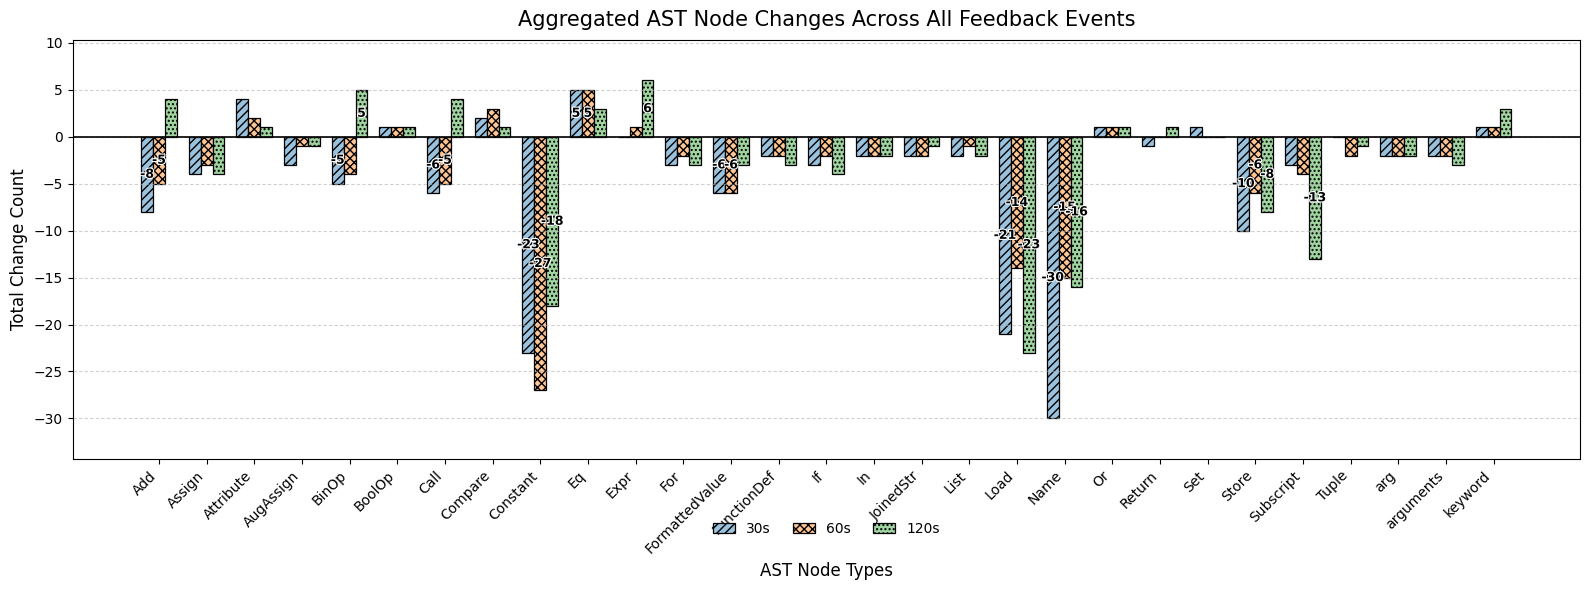

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mtick
import matplotlib.patheffects as pe
import numpy as np

def _lighten(color, amount=0.45):
    r, g, b = mcolors.to_rgb(color)
    return (1 - amount) + amount * r, (1 - amount) + amount * g, (1 - amount) + amount * b

def plot_ast_changes_printsafe(aggregate_changes, figsize=(16, 6)):
    
    deltas = [30, 60, 120]
    node_types = sorted(set().union(*[set(aggregate_changes[d].keys()) for d in deltas]))

    # grouped bars
    bar_width = 0.25
    x = np.arange(len(node_types))

    # soft colors + hatches (B/W safe)
    base = {30: "#1f77b4", 60: "#ff7f0e", 120: "#2ca02c"}
    colors = {d: _lighten(base[d], amount=0.45) for d in deltas}
    hatches = {30: "////", 60: "xxxx", 120: "...."}

    fig, ax = plt.subplots(figsize=figsize)

    # collect all heights for autoscale and label threshold
    all_vals = []
    bar_containers = []
    for i, d in enumerate(deltas):
        vals = [aggregate_changes[d].get(nt, 0) for nt in node_types]
        all_vals.extend(vals)
        bc = ax.bar(
            x + i * bar_width, vals, bar_width,
            color=colors[d], hatch=hatches[d],
            edgecolor="black", linewidth=0.9, label=f"{d}s"
        )
        bar_containers.append(bc)

    # axes, grid, ticks
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(node_types, rotation=45, ha="right", fontsize=10)
    ax.yaxis.set_major_locator(mtick.MaxNLocator(integer=True))
    ax.grid(axis="y", linestyle=(0, (3, 2)), linewidth=0.8, alpha=0.6)
    ax.set_xlabel("AST Node Types", fontsize=12)
    ax.set_ylabel("Total Change Count", fontsize=12)
    ax.set_title("Aggregated AST Node Changes Across All Feedback Events", fontsize=15, pad=10)

    # zero line
    ax.axhline(0, color="black", linewidth=1.2)

    # autoscale with margin
    if all_vals:
        lo, hi = min(all_vals), max(all_vals)
        span = max(1, hi - lo)
        ax.set_ylim(lo - 0.12 * span, hi + 0.12 * span)

    # bold outlined labels for noticeable bars
    mag = np.array([abs(v) for v in all_vals]) if all_vals else np.array([0])
    thr = max(3, np.percentile(mag, 75))  # show only larger bars; minimum 3
    for bc in bar_containers:
        for rect in bc:
            h = rect.get_height()
            if abs(h) >= thr:
                x_pos = rect.get_x() + rect.get_width() / 2.0
                y_pos = rect.get_y() + h / 2.0
                ax.text(
                    x_pos, y_pos, f"{int(h)}",
                    ha="center", va="center", fontsize=9, fontweight="bold", color="black",
                    path_effects=[pe.withStroke(linewidth=1.6, foreground="white")]
                )

    # legend outside, compact
    ax.legend(ncol=3, loc="upper center", bbox_to_anchor=(0.5, -0.12),
              frameon=False, fontsize=10, handlelength=1.6, columnspacing=1.6)

    fig.tight_layout()
    return fig, ax

from collections import Counter
import ast
import pandas as pd

def parse_code_to_ast(code_str):
    if not isinstance(code_str, str):
        return None
    try:
        return ast.parse(code_str)
    except Exception:
        return None

def ast_difference(ast_before, ast_after):
    if ast_before is None or ast_after is None:
        return {}
    b = Counter(type(n).__name__ for n in ast.walk(ast_before))
    a = Counter(type(n).__name__ for n in ast.walk(ast_after))
    diff = {k: a.get(k, 0) - b.get(k, 0) for k in set(b) | set(a)}
    return {k: v for k, v in diff.items() if v != 0}

# Build aggregates
aggregate_changes = {30: Counter(), 60: Counter(), 120: Counter()}

for _, row in results_df.iterrows():
    base_ast = parse_code_to_ast(row.get("ai_code_sent"))
    for d in (30, 60, 120):
        code_after = row.get(f"code_{d}s")
        if pd.isna(code_after) or not isinstance(code_after, str):
            continue
        after_ast = parse_code_to_ast(code_after)
        diff = ast_difference(base_ast, after_ast)
        if diff:
            aggregate_changes[d].update(diff)

# Plot
fig, ax = plot_ast_changes_printsafe(aggregate_changes)
fig.savefig("ast_node_changes_printsafe.png", dpi=300, bbox_inches="tight")
plt.show()


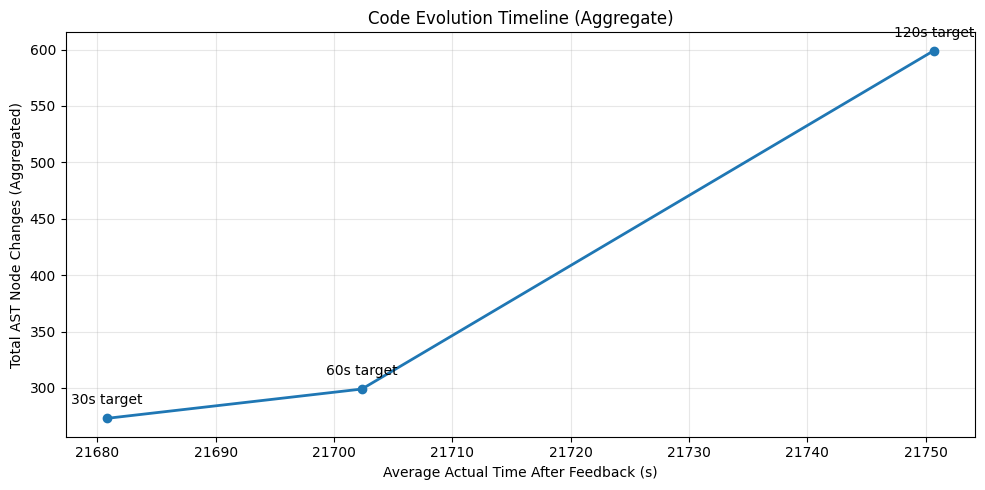

In [13]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import ast

def parse_code_to_ast(code_str):
    try:
        return ast.parse(code_str)
    except Exception:
        return None

def ast_difference(ast_before, ast_after):
    if ast_before is None or ast_after is None:
        return None
    nodes_before = Counter(type(n).__name__ for n in ast.walk(ast_before))
    nodes_after = Counter(type(n).__name__ for n in ast.walk(ast_after))
    diff = {}
    for key in set(nodes_before.keys()) | set(nodes_after.keys()):
        delta = nodes_after.get(key, 0) - nodes_before.get(key, 0)
        if delta != 0:
            diff[key] = delta
    return diff

# Aggregate AST changes and times
total_changes_by_delta = {}
actual_times_by_delta = {}

for delta in [30, 60, 120]:
    total_change = 0
    actual_times = []

    for _, row in results_df.iterrows():
        base_ast = parse_code_to_ast(row['ai_code_sent'])
        code_after = row.get(f'code_{delta}s')
        if pd.isna(code_after):
            continue
        after_ast = parse_code_to_ast(code_after)
        diff = ast_difference(base_ast, after_ast)
        if diff:
            total_change += sum(abs(v) for v in diff.values())
        actual_times.append(row.get(f'time_diff_{delta}s'))

    # Store average time and total AST change per delta
    total_changes_by_delta[delta] = total_change
    actual_times_by_delta[delta] = np.mean(actual_times)

# Prepare final data
sorted_deltas = sorted(total_changes_by_delta.keys())
avg_times = [actual_times_by_delta[d] for d in sorted_deltas]
change_counts = [total_changes_by_delta[d] for d in sorted_deltas]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_times, change_counts, marker='o', linewidth=2)

# Annotate
for delta, x, y in zip(sorted_deltas, avg_times, change_counts):
    plt.annotate(f'{delta}s target', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Average Actual Time After Feedback (s)')
plt.ylabel('Total AST Node Changes (Aggregated)')
plt.title('Code Evolution Timeline (Aggregate)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\mfawa\AppData\Local\Temp\ipykernel_15528\1857280590.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.fillna(0)


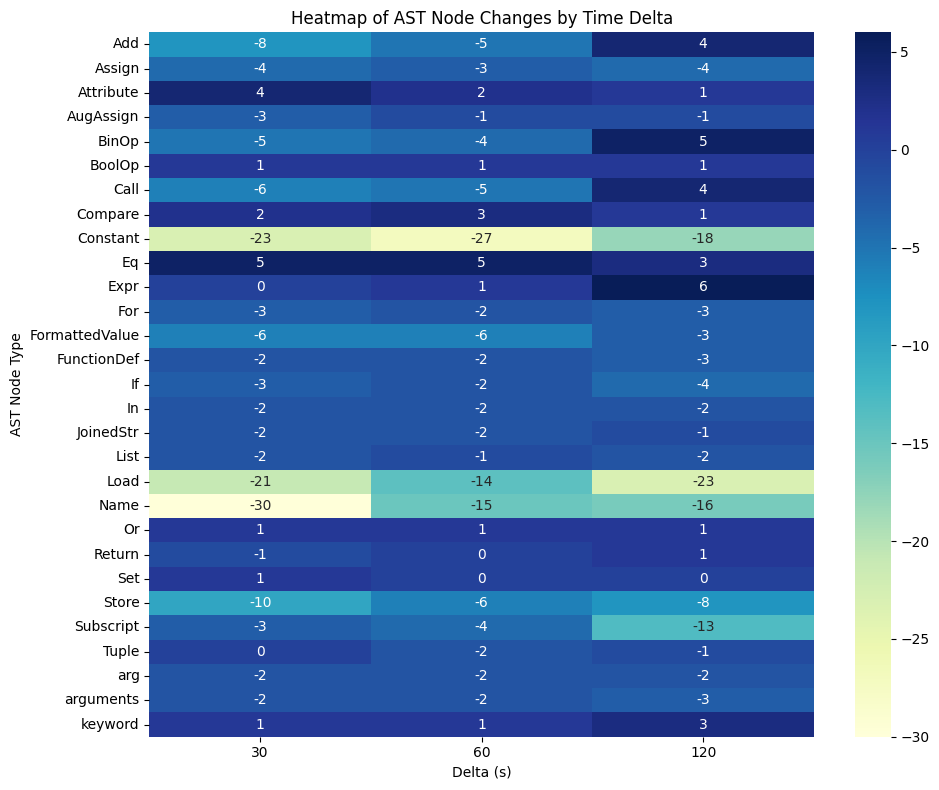

In [11]:
import seaborn as sns

# Construct heatmap data
heatmap_data = pd.DataFrame(index=sorted(set().union(*[v.keys() for v in aggregate_changes.values()])),
                            columns=[30, 60, 120])

for delta in [30, 60, 120]:
    for node in heatmap_data.index:
        heatmap_data.loc[node, delta] = aggregate_changes[delta].get(node, 0)

heatmap_data = heatmap_data.fillna(0)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of AST Node Changes by Time Delta")
plt.xlabel("Delta (s)")
plt.ylabel("AST Node Type")
plt.tight_layout()
plt.show()


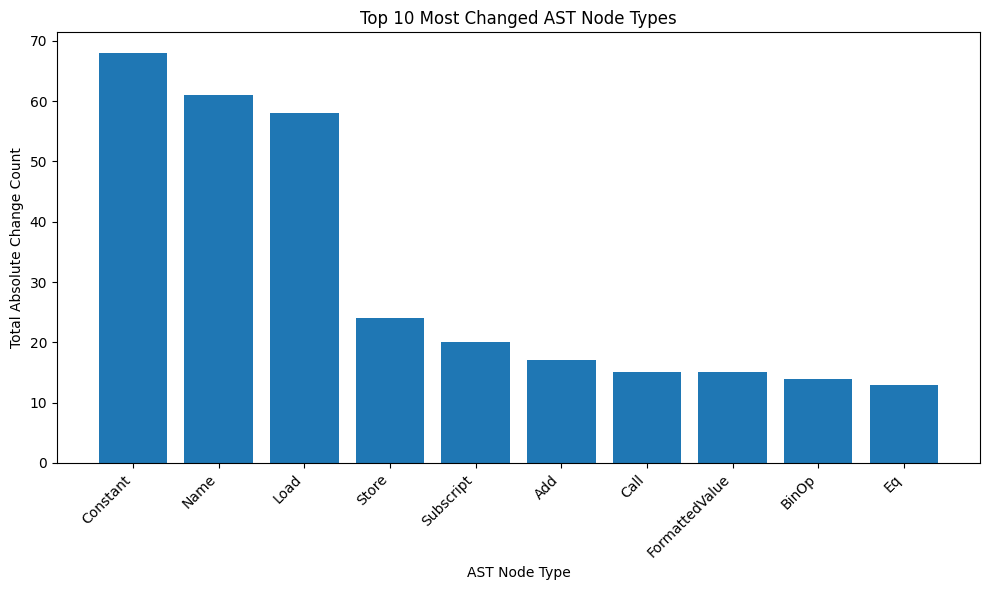

In [12]:
# Sum across deltas
total_ast_changes = Counter()
for delta_counter in aggregate_changes.values():
    total_ast_changes.update({k: abs(v) for k, v in delta_counter.items()})

top_k = total_ast_changes.most_common(10)
nodes, counts = zip(*top_k)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(nodes, counts)
plt.title("Top 10 Most Changed AST Node Types")
plt.xlabel("AST Node Type")
plt.ylabel("Total Absolute Change Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Pre AI Feedback Call AST Changes

In [78]:
results_before = []

# Convert timestamp columns
parsable_temp_codes['Timestamp'] = pd.to_datetime(parsable_temp_codes['Timestamp'])
st1_ai_feedback_calls['timestamp'] = pd.to_datetime(st1_ai_feedback_calls['timestamp'])

# Iterate per student and exercise
grouped_ai = st1_ai_feedback_calls.groupby(['userId', 'exercise_id'])

for (student_id, ex_id), group in grouped_ai:
    first_ai_call = group.sort_values('timestamp').iloc[0]
    ai_time = first_ai_call['timestamp']

    # Filter matching parsable code states
    relevant_parsable = parsable_temp_codes[
        (parsable_temp_codes['Student ID'] == student_id) &
        (parsable_temp_codes['Exercise ID'] == ex_id)
    ]

    before_candidates = relevant_parsable[relevant_parsable['Timestamp'] < ai_time].copy()
    if before_candidates.empty:
        continue

    before_candidates = before_candidates.sort_values(by='Timestamp', ascending=False)
    # Drop all rows in before_candidates for which AST cannot be parsed
    def is_compilable(code):
        try:
            ast.parse(code)
            return True
        except SyntaxError:
            return False
    # Snapshot time is the timestamp of the first code snapshot when in parsable_temp_codes
    row = before_candidates.iloc[0]
    first_snapshot_time = row['Timestamp']
    before_candidates = before_candidates[before_candidates['Inserted Text'].apply(is_compilable)]
    if before_candidates.empty:
        continue

    result_entry = {
        'id': first_ai_call['id'],
        'user_id': first_ai_call['userId'],
        'exercise_type': first_ai_call['exercise_type'],
        'exercise_id': first_ai_call['exercise_id'],
        'code_latest_snapshot': first_ai_call['code_latest_snapshot'],
        'feedback': first_ai_call['feedback'],
        'timestamp': first_ai_call['timestamp'],
        'ai_code_sent': ai_code_sent,
    }

    # Check for each time delta
    for delta in [30, 60, 120]:
        target_time = first_snapshot_time + pd.Timedelta(seconds=delta)
        
        # Get all codes after AI call (exclude exactly at ai_time)
        after_candidates = parsable_temp_codes[parsable_temp_codes['Timestamp'] > first_snapshot_time].copy()
        
        if after_candidates.empty:
            result_entry[f'code_{delta}s'] = None
            result_entry[f'time_diff_{delta}s'] = None
            continue
        
        # Calculate absolute time differences and if code is after target_time
        after_candidates['delta_abs'] = (after_candidates['Timestamp'] - target_time).abs()
        after_candidates['is_after'] = (after_candidates['Timestamp'] >= target_time)
        
        # Sort by closest absolute difference, preferring codes after target_time
        after_candidates_sorted = after_candidates.sort_values(
            by=['delta_abs', 'is_after'],
            ascending=[True, False]  # False for is_after to have True (1) first
        )
        
        # Get the closest code
        closest_code = after_candidates_sorted.iloc[0]
        
        # Calculate time difference from AI call
        time_diff = (closest_code['Timestamp'] - first_snapshot_time).total_seconds()
        
        result_entry[f'code_{delta}s'] = closest_code['Inserted Text']
        result_entry[f'time_diff_{delta}s'] = time_diff

    # for delta in [30, 60, 120]:
    #     target_time = snapshot_time + pd.Timedelta(seconds=delta)

    #     # Pick candidates around 30, 60, 120 seconds after the snapshot time, if the code doesnt exist 30 seconds then pick the closest one after the snapshot time


    #     history_candidates = before_candidates[before_candidates['Timestamp'] > snapshot_time].copy()
    #     if history_candidates.empty:
    #         result_entry[f'code_{delta}s'] = None
    #         result_entry[f'time_diff_{delta}s'] = None
    #         continue

    #     history_candidates['delta_abs'] = (history_candidates['Timestamp'] - target_time).abs()
    #     history_candidates = history_candidates.sort_values(by='delta_abs')

    #     for _, c in history_candidates.iterrows():
    #         result_entry[f'code_{delta}s'] = c['Inserted Text']
    #         result_entry[f'time_diff_{delta}s'] = (snapshot_time - c['Timestamp']).total_seconds()
    #         break
    #     else:
    #         result_entry[f'code_{delta}s'] = None
    #         result_entry[f'time_diff_{delta}s'] = None

    results_before.append(result_entry)
results_before_df = pd.DataFrame(results_before)


### Plots

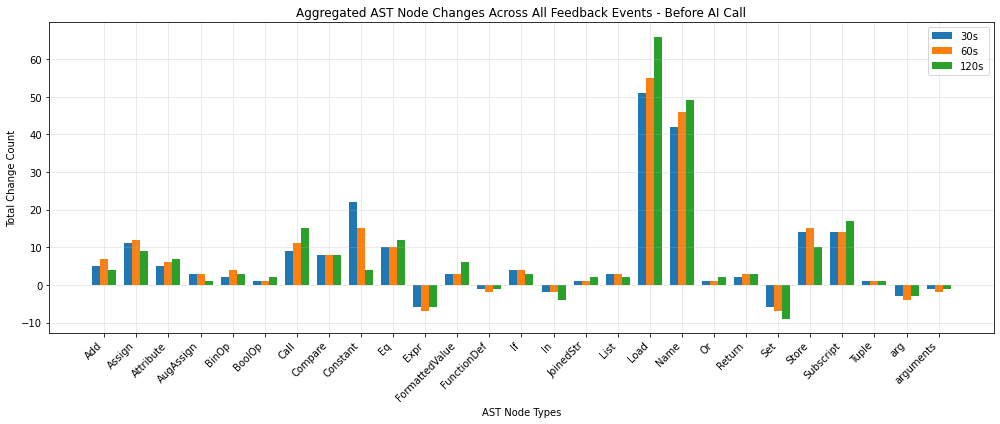

In [81]:
from collections import Counter
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

def parse_code_to_ast(code_str):
    try:
        return ast.parse(code_str)
    except Exception:
        return None

def ast_difference(ast_before, ast_after):
    if ast_before is None or ast_after is None:
        return None
    nodes_before = Counter(type(n).__name__ for n in ast.walk(ast_before))
    nodes_after = Counter(type(n).__name__ for n in ast.walk(ast_after))
    diff = {}
    all_keys = set(nodes_before.keys()) | set(nodes_after.keys())
    for key in all_keys:
        change = nodes_after.get(key, 0) - nodes_before.get(key, 0)
        if change != 0:
            diff[key] = change
    return diff

# Aggregate changes across all rows and deltas
aggregate_changes = {30: Counter(), 60: Counter(), 120: Counter()}

for _, row in results_before_df.iterrows():
    base_ast = parse_code_to_ast(row['ai_code_sent'])
    for delta in [30, 60, 120]:
        code_after = row.get(f'code_{delta}s')
        if pd.isna(code_after):
            continue
        after_ast = parse_code_to_ast(code_after)
        diff = ast_difference(base_ast, after_ast)
        if diff:
            for k, v in diff.items():
                aggregate_changes[delta][k] += v

# Prepare for plotting
all_node_types = sorted(set().union(*[d.keys() for d in aggregate_changes.values()]))
bar_width = 0.25
index = np.arange(len(all_node_types))

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))
for i, delta in enumerate([30, 60, 120]):
    values = [aggregate_changes[delta].get(node, 0) for node in all_node_types]
    ax.bar(index + i * bar_width, values, bar_width, label=f'{delta}s')

ax.set_xlabel('AST Node Types')
ax.set_ylabel('Total Change Count')
ax.set_title('Aggregated AST Node Changes Across All Feedback Events - Before AI Call')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(all_node_types, rotation=45, ha='right')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


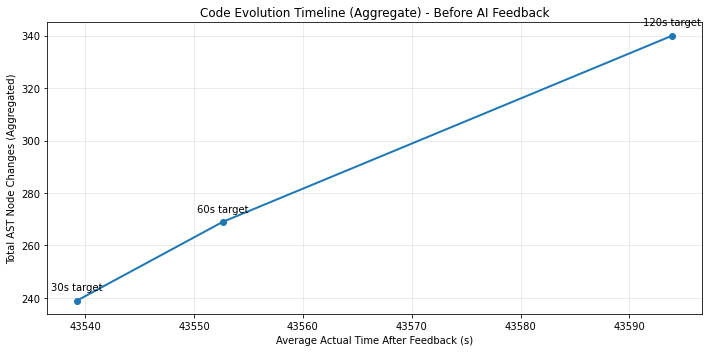

In [82]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import ast

def parse_code_to_ast(code_str):
    try:
        return ast.parse(code_str)
    except Exception:
        return None

def ast_difference(ast_before, ast_after):
    if ast_before is None or ast_after is None:
        return None
    nodes_before = Counter(type(n).__name__ for n in ast.walk(ast_before))
    nodes_after = Counter(type(n).__name__ for n in ast.walk(ast_after))
    diff = {}
    for key in set(nodes_before.keys()) | set(nodes_after.keys()):
        delta = nodes_after.get(key, 0) - nodes_before.get(key, 0)
        if delta != 0:
            diff[key] = delta
    return diff

# Aggregate AST changes and times
total_changes_by_delta = {}
actual_times_by_delta = {}

for delta in [30, 60, 120]:
    total_change = 0
    actual_times = []

    for _, row in results_before_df.iterrows():
        base_ast = parse_code_to_ast(row['ai_code_sent'])
        code_after = row.get(f'code_{delta}s')
        if pd.isna(code_after):
            continue
        after_ast = parse_code_to_ast(code_after)
        diff = ast_difference(base_ast, after_ast)
        if diff:
            total_change += sum(abs(v) for v in diff.values())
        actual_times.append(row.get(f'time_diff_{delta}s'))

    # Store average time and total AST change per delta
    total_changes_by_delta[delta] = total_change
    actual_times_by_delta[delta] = np.mean(actual_times)

# Prepare final data
sorted_deltas = sorted(total_changes_by_delta.keys())
avg_times = [actual_times_by_delta[d] for d in sorted_deltas]
change_counts = [total_changes_by_delta[d] for d in sorted_deltas]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_times, change_counts, marker='o', linewidth=2)

# Annotate
for delta, x, y in zip(sorted_deltas, avg_times, change_counts):
    plt.annotate(f'{delta}s target', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Average Actual Time After Feedback (s)')
plt.ylabel('Total AST Node Changes (Aggregated)')
plt.title('Code Evolution Timeline (Aggregate) - Before AI Feedback')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\mfawa\AppData\Local\Temp\ipykernel_32356\1811402223.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_data = heatmap_data.fillna(0)


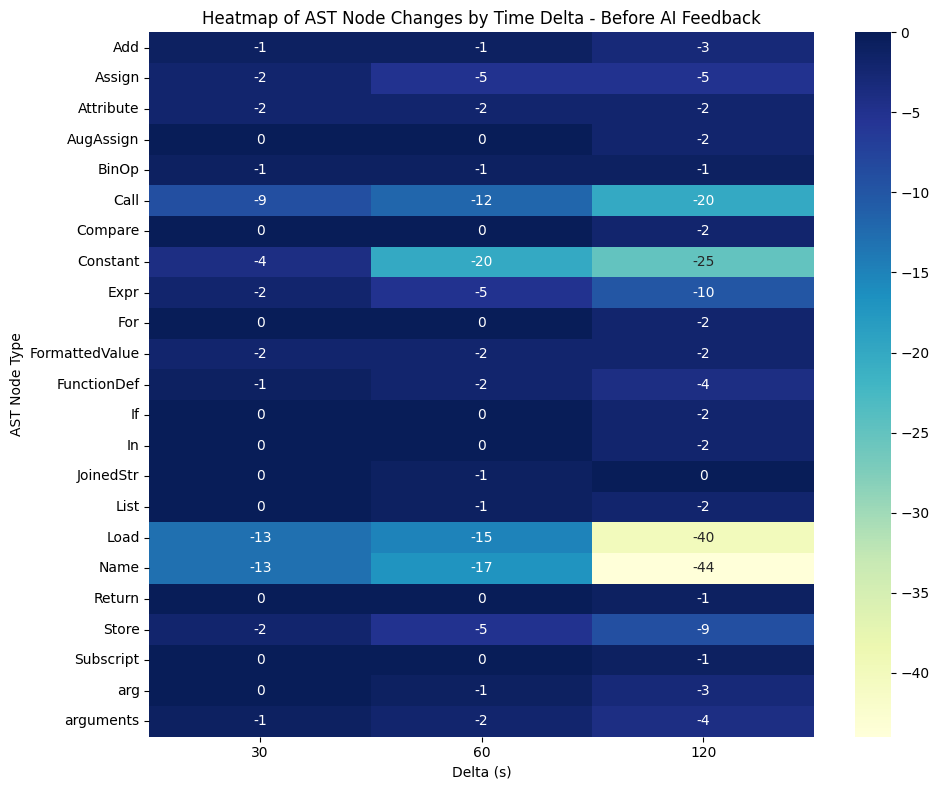

In [ ]:
import seaborn as sns

# Construct heatmap data
heatmap_data = pd.DataFrame(index=sorted(set().union(*[v.keys() for v in aggregate_changes.values()])),
                            columns=[30, 60, 120])

for delta in [30, 60, 120]:
    for node in heatmap_data.index:
        heatmap_data.loc[node, delta] = aggregate_changes[delta].get(node, 0)

heatmap_data = heatmap_data.fillna(0)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of AST Node Changes by Time Delta - Before AI Feedback")
plt.xlabel("Delta (s)")
plt.ylabel("AST Node Type")
plt.tight_layout()
plt.show()


## Single Feedback AST Changes

) missing from font(s) DejaVu Sans.pykernel_66128\2637230565.py:204: UserWarning: Glyph 13 (
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
C:\Users\mfawa\AppData\Local\Temp\ipykernel_66128\2637230565.py:204: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
) missing from font(s) DejaVu Sans.hon\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


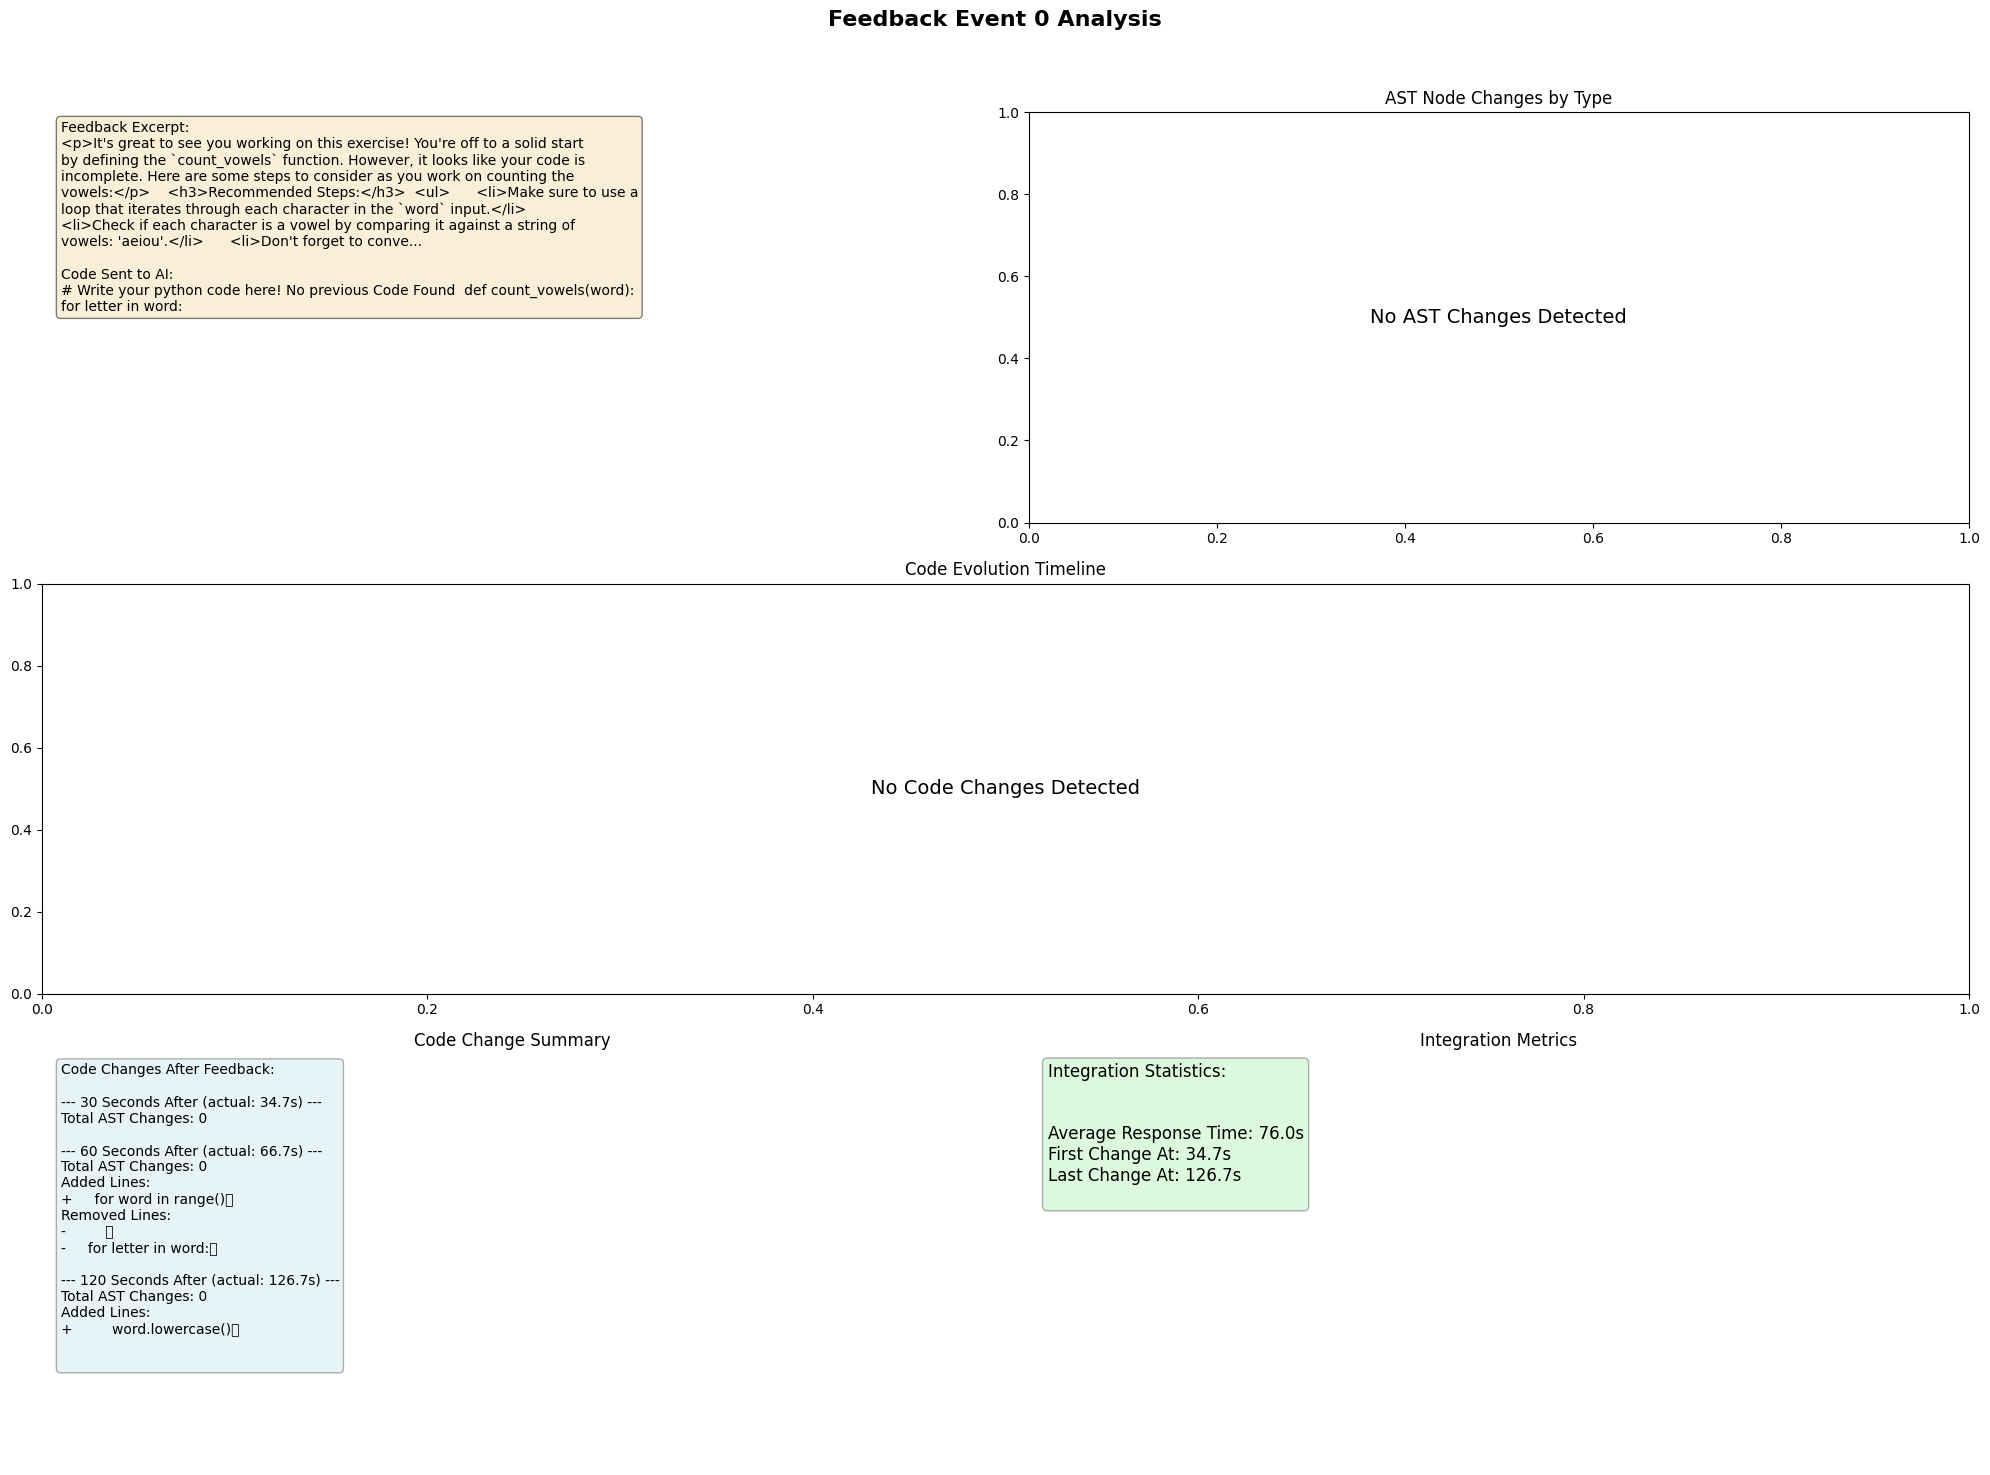

) missing from font(s) DejaVu Sans.pykernel_66128\2637230565.py:204: UserWarning: Glyph 13 (
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
C:\Users\mfawa\AppData\Local\Temp\ipykernel_66128\2637230565.py:204: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
) missing from font(s) DejaVu Sans.hon\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


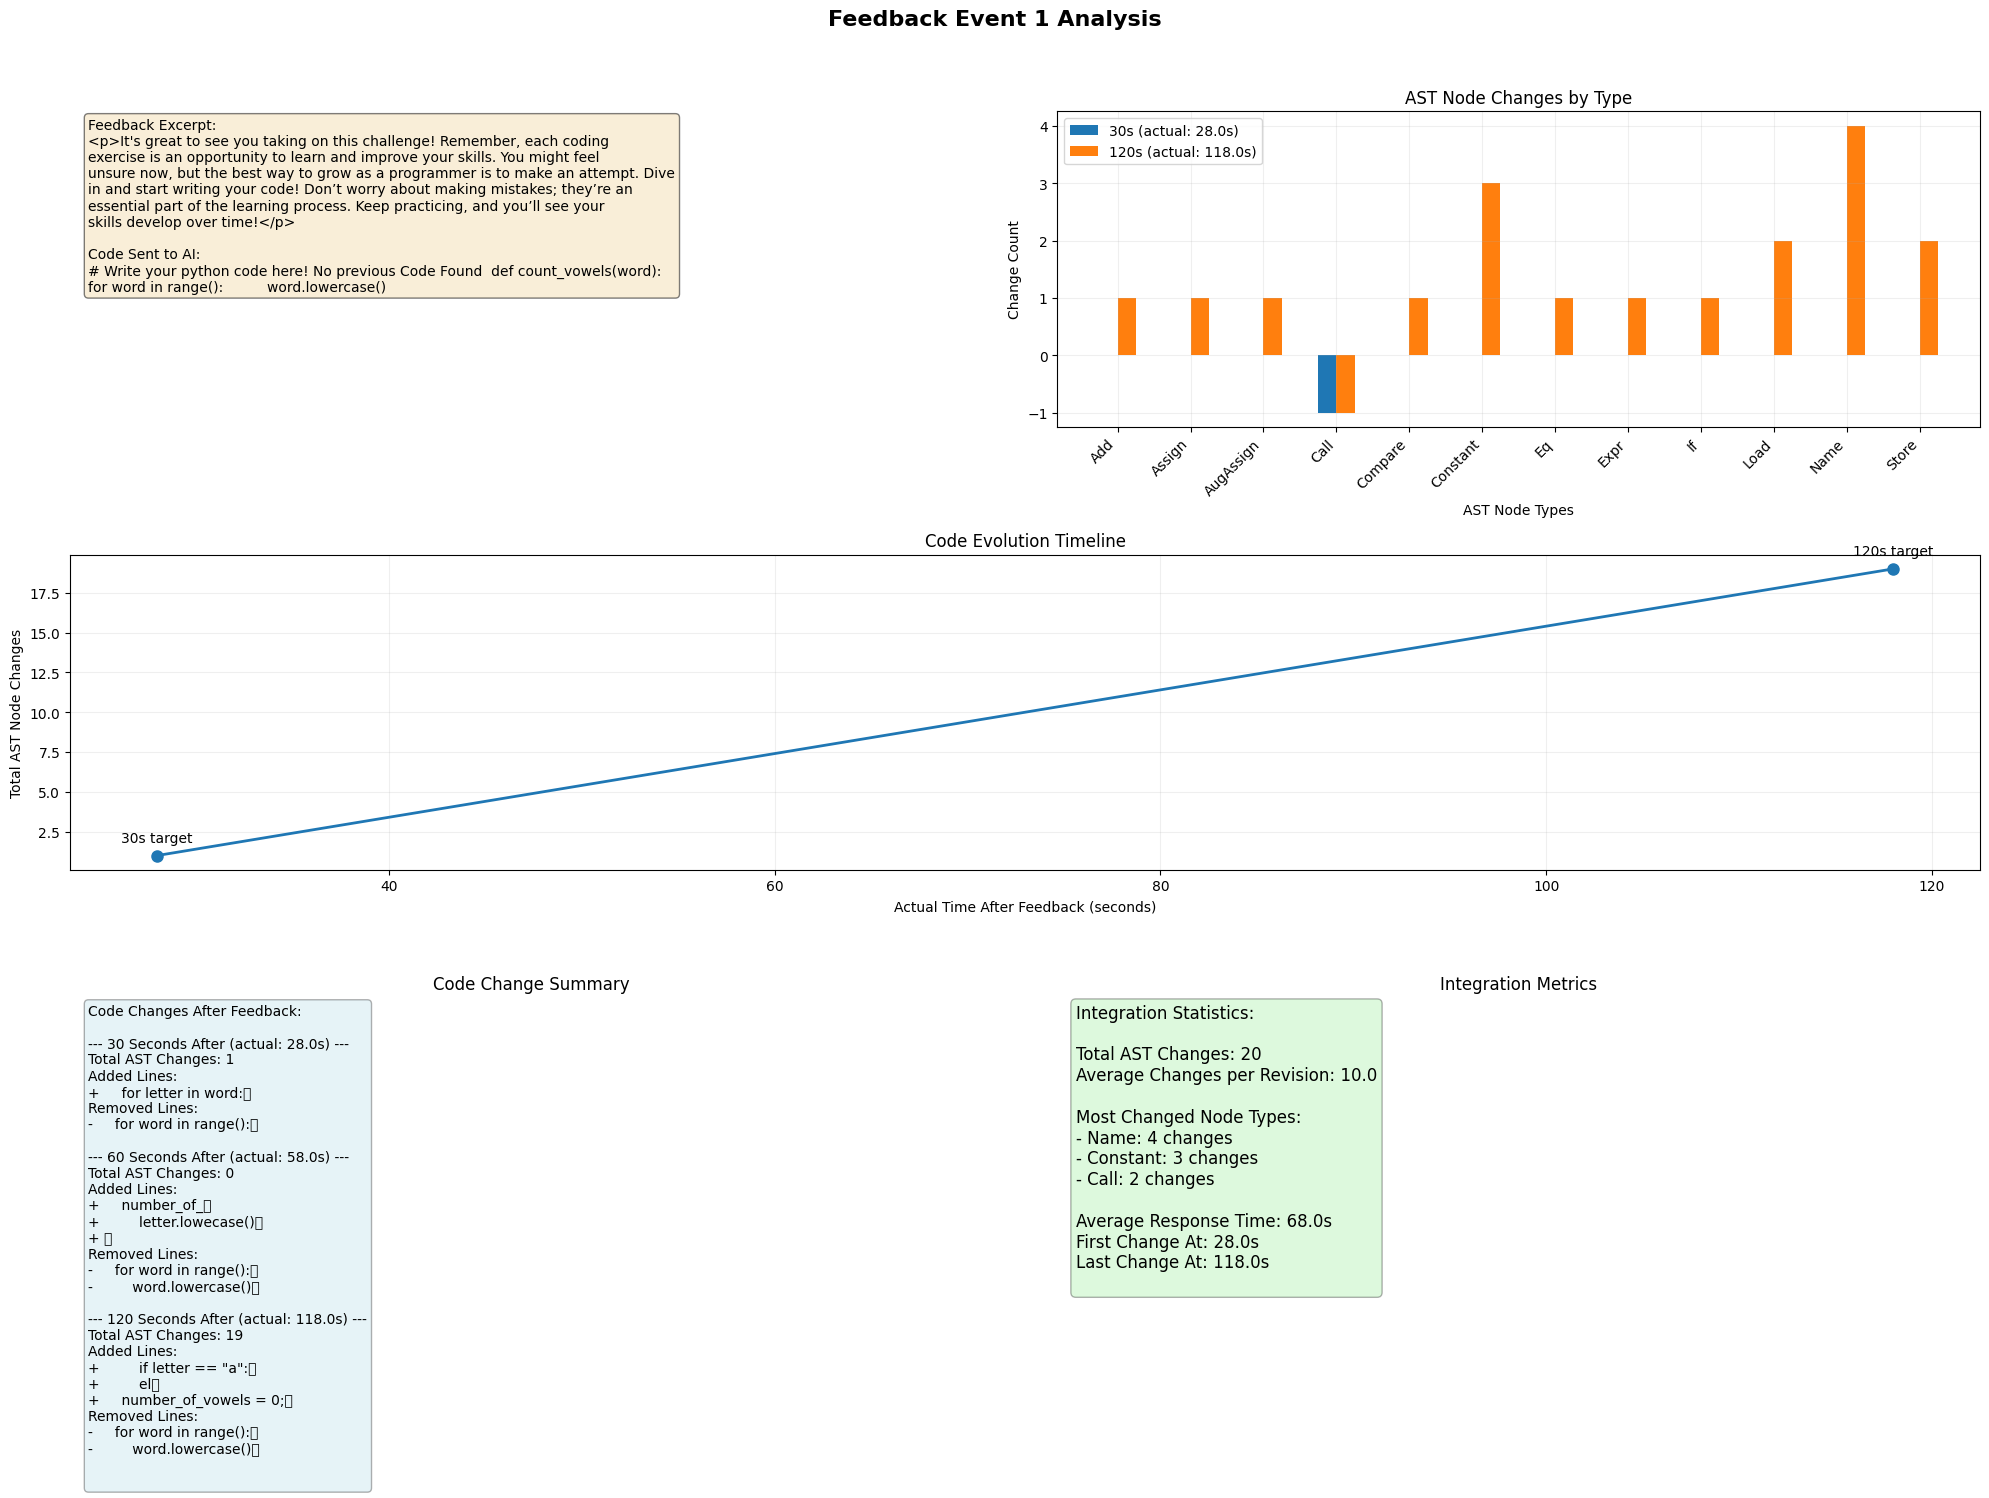

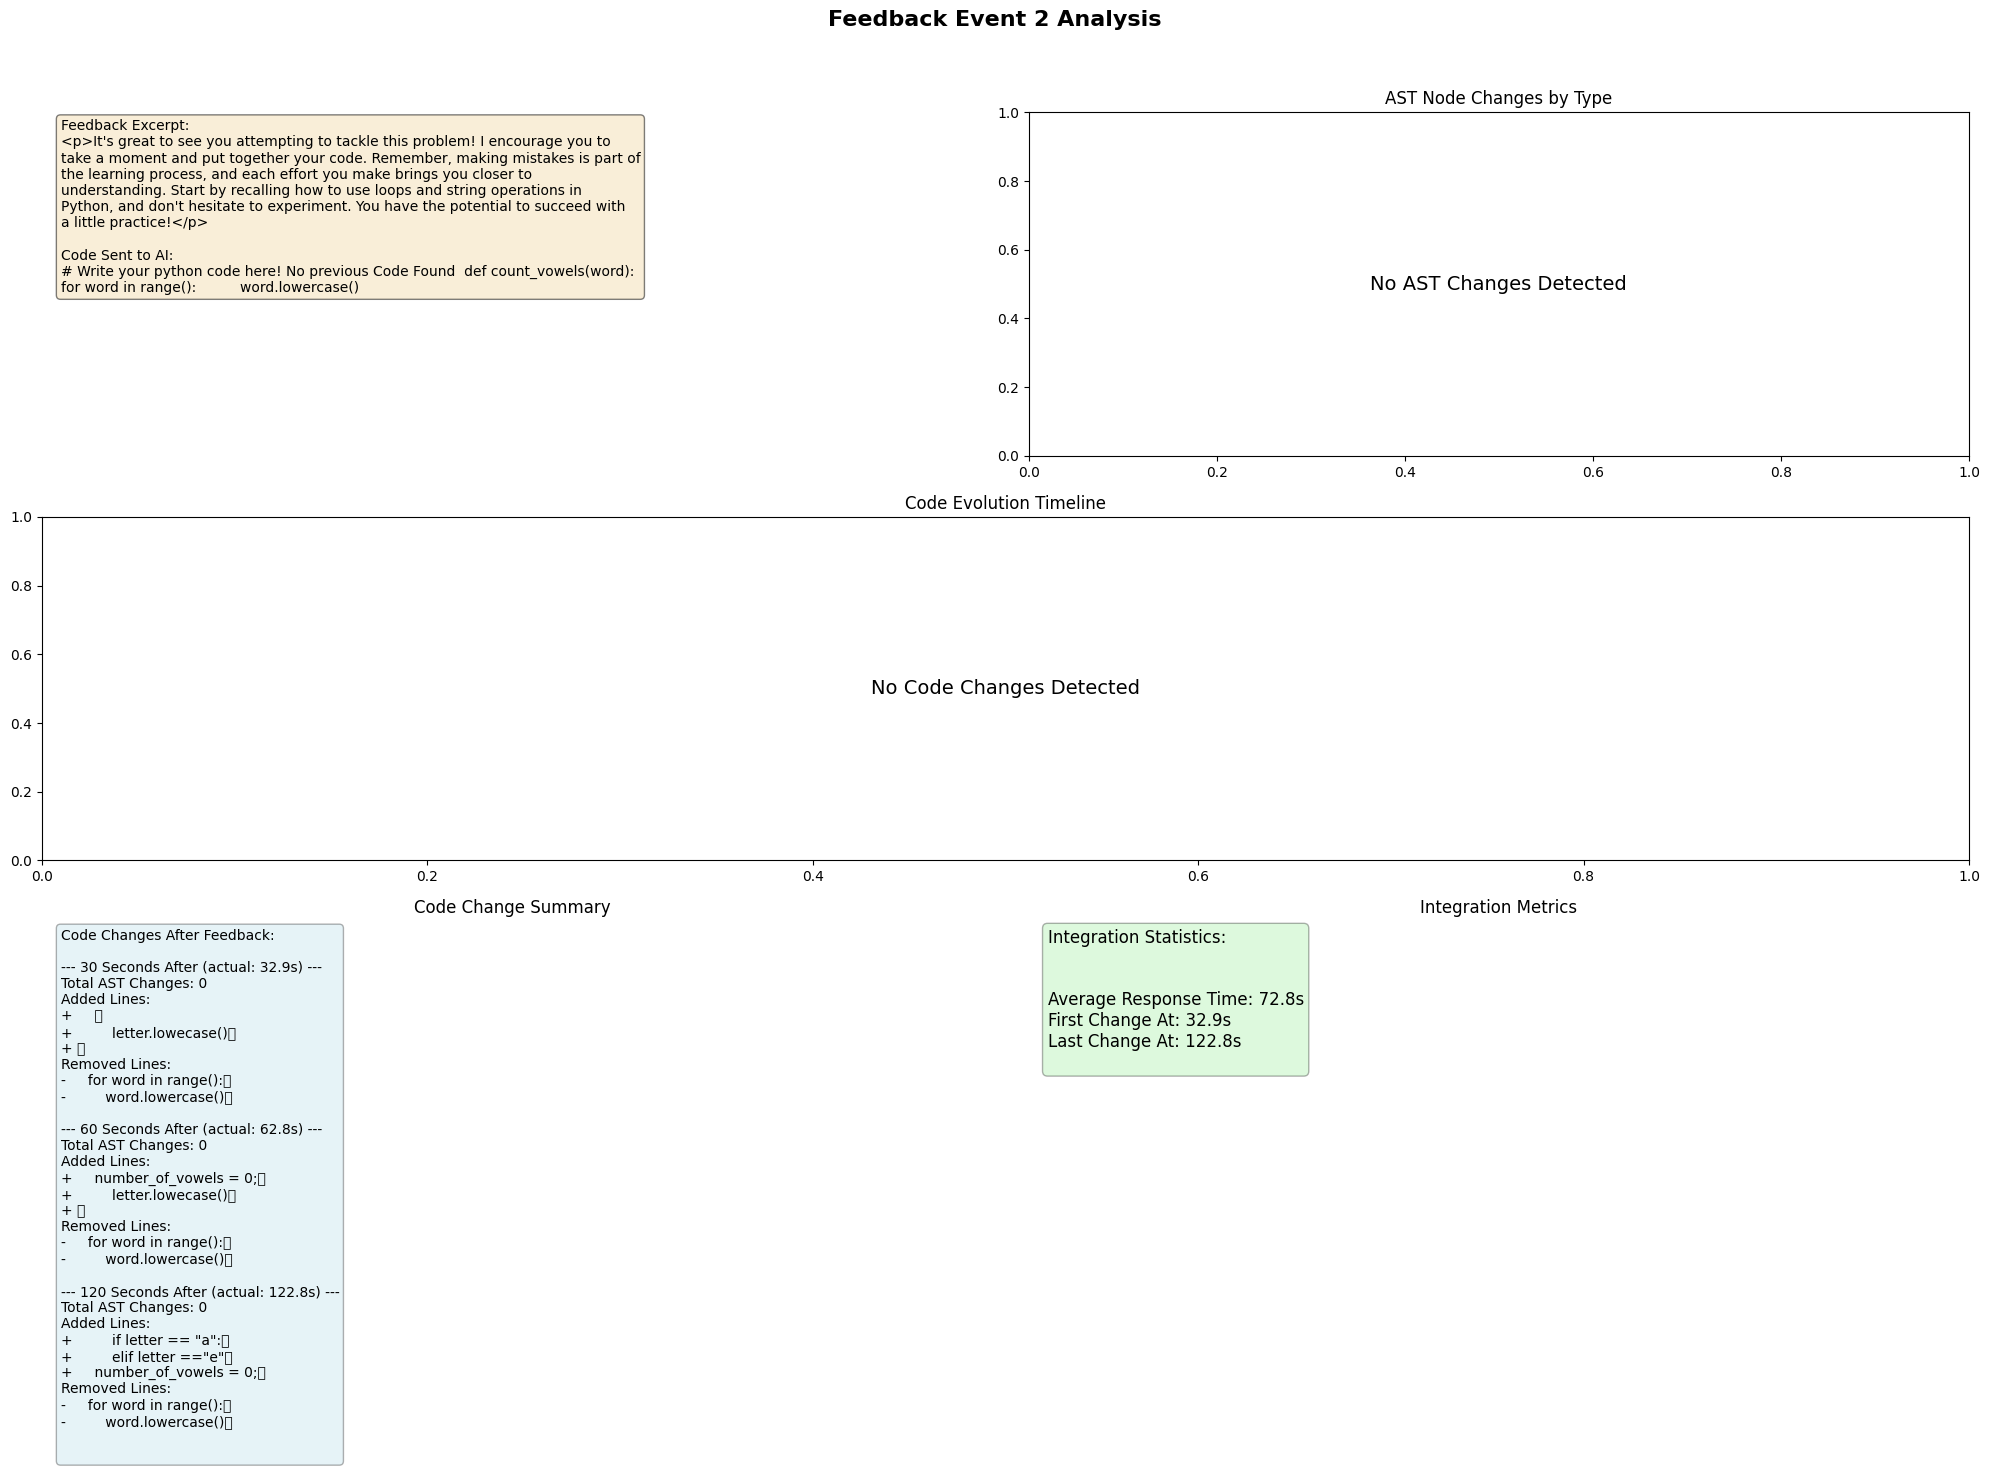

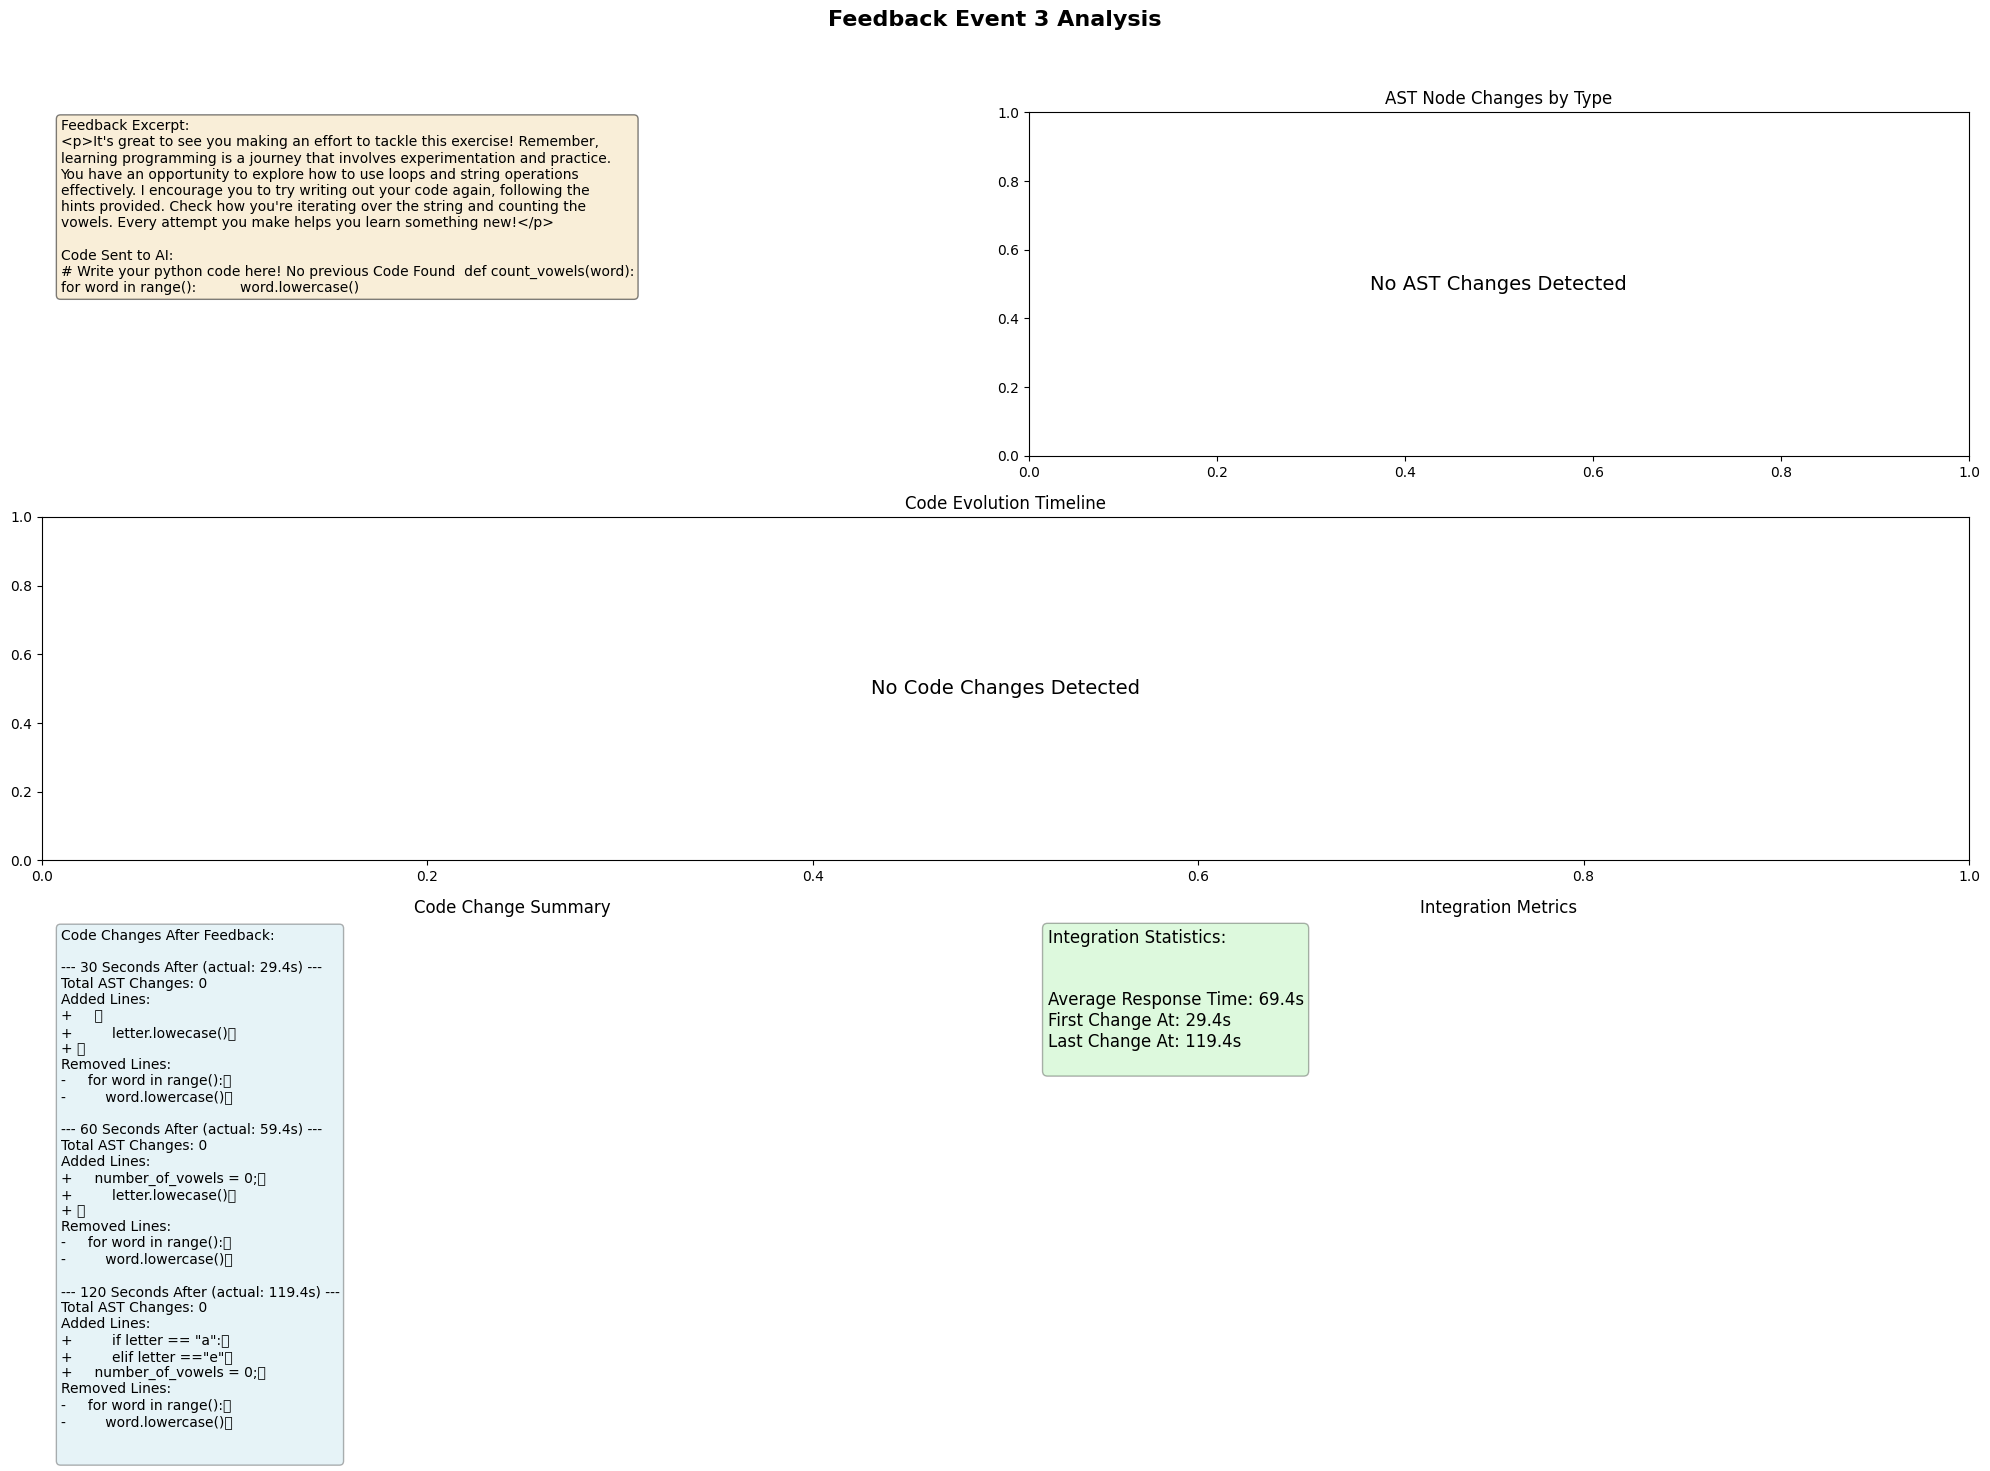

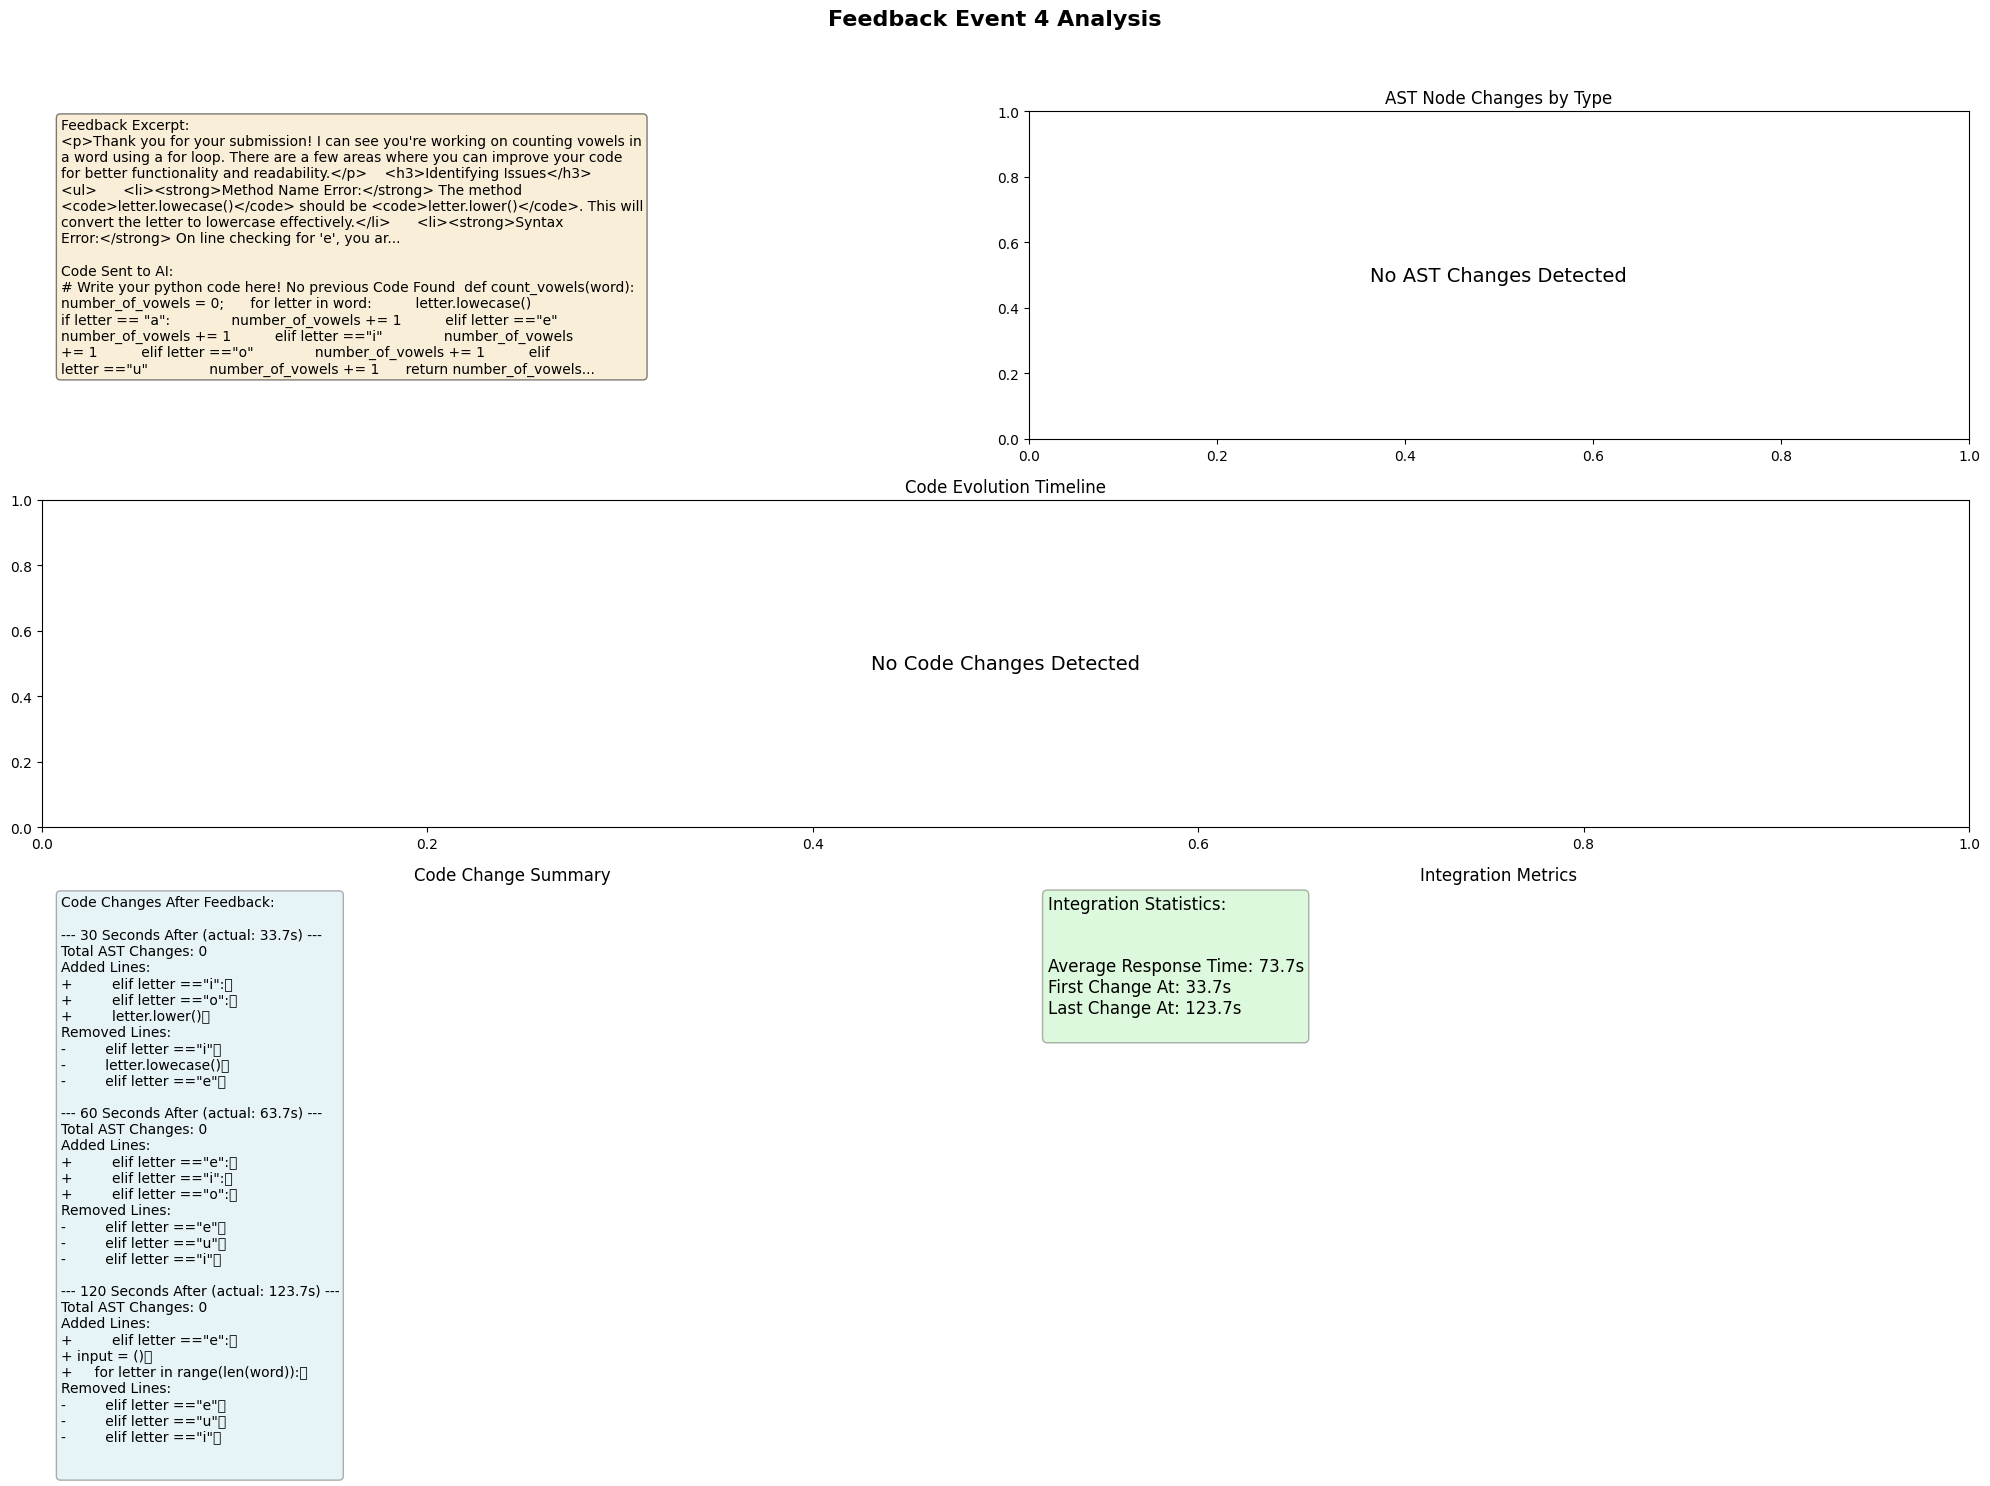

) missing from font(s) DejaVu Sans.pykernel_66128\2637230565.py:204: UserWarning: Glyph 13 (
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
C:\Users\mfawa\AppData\Local\Temp\ipykernel_66128\2637230565.py:204: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
) missing from font(s) DejaVu Sans.hon\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


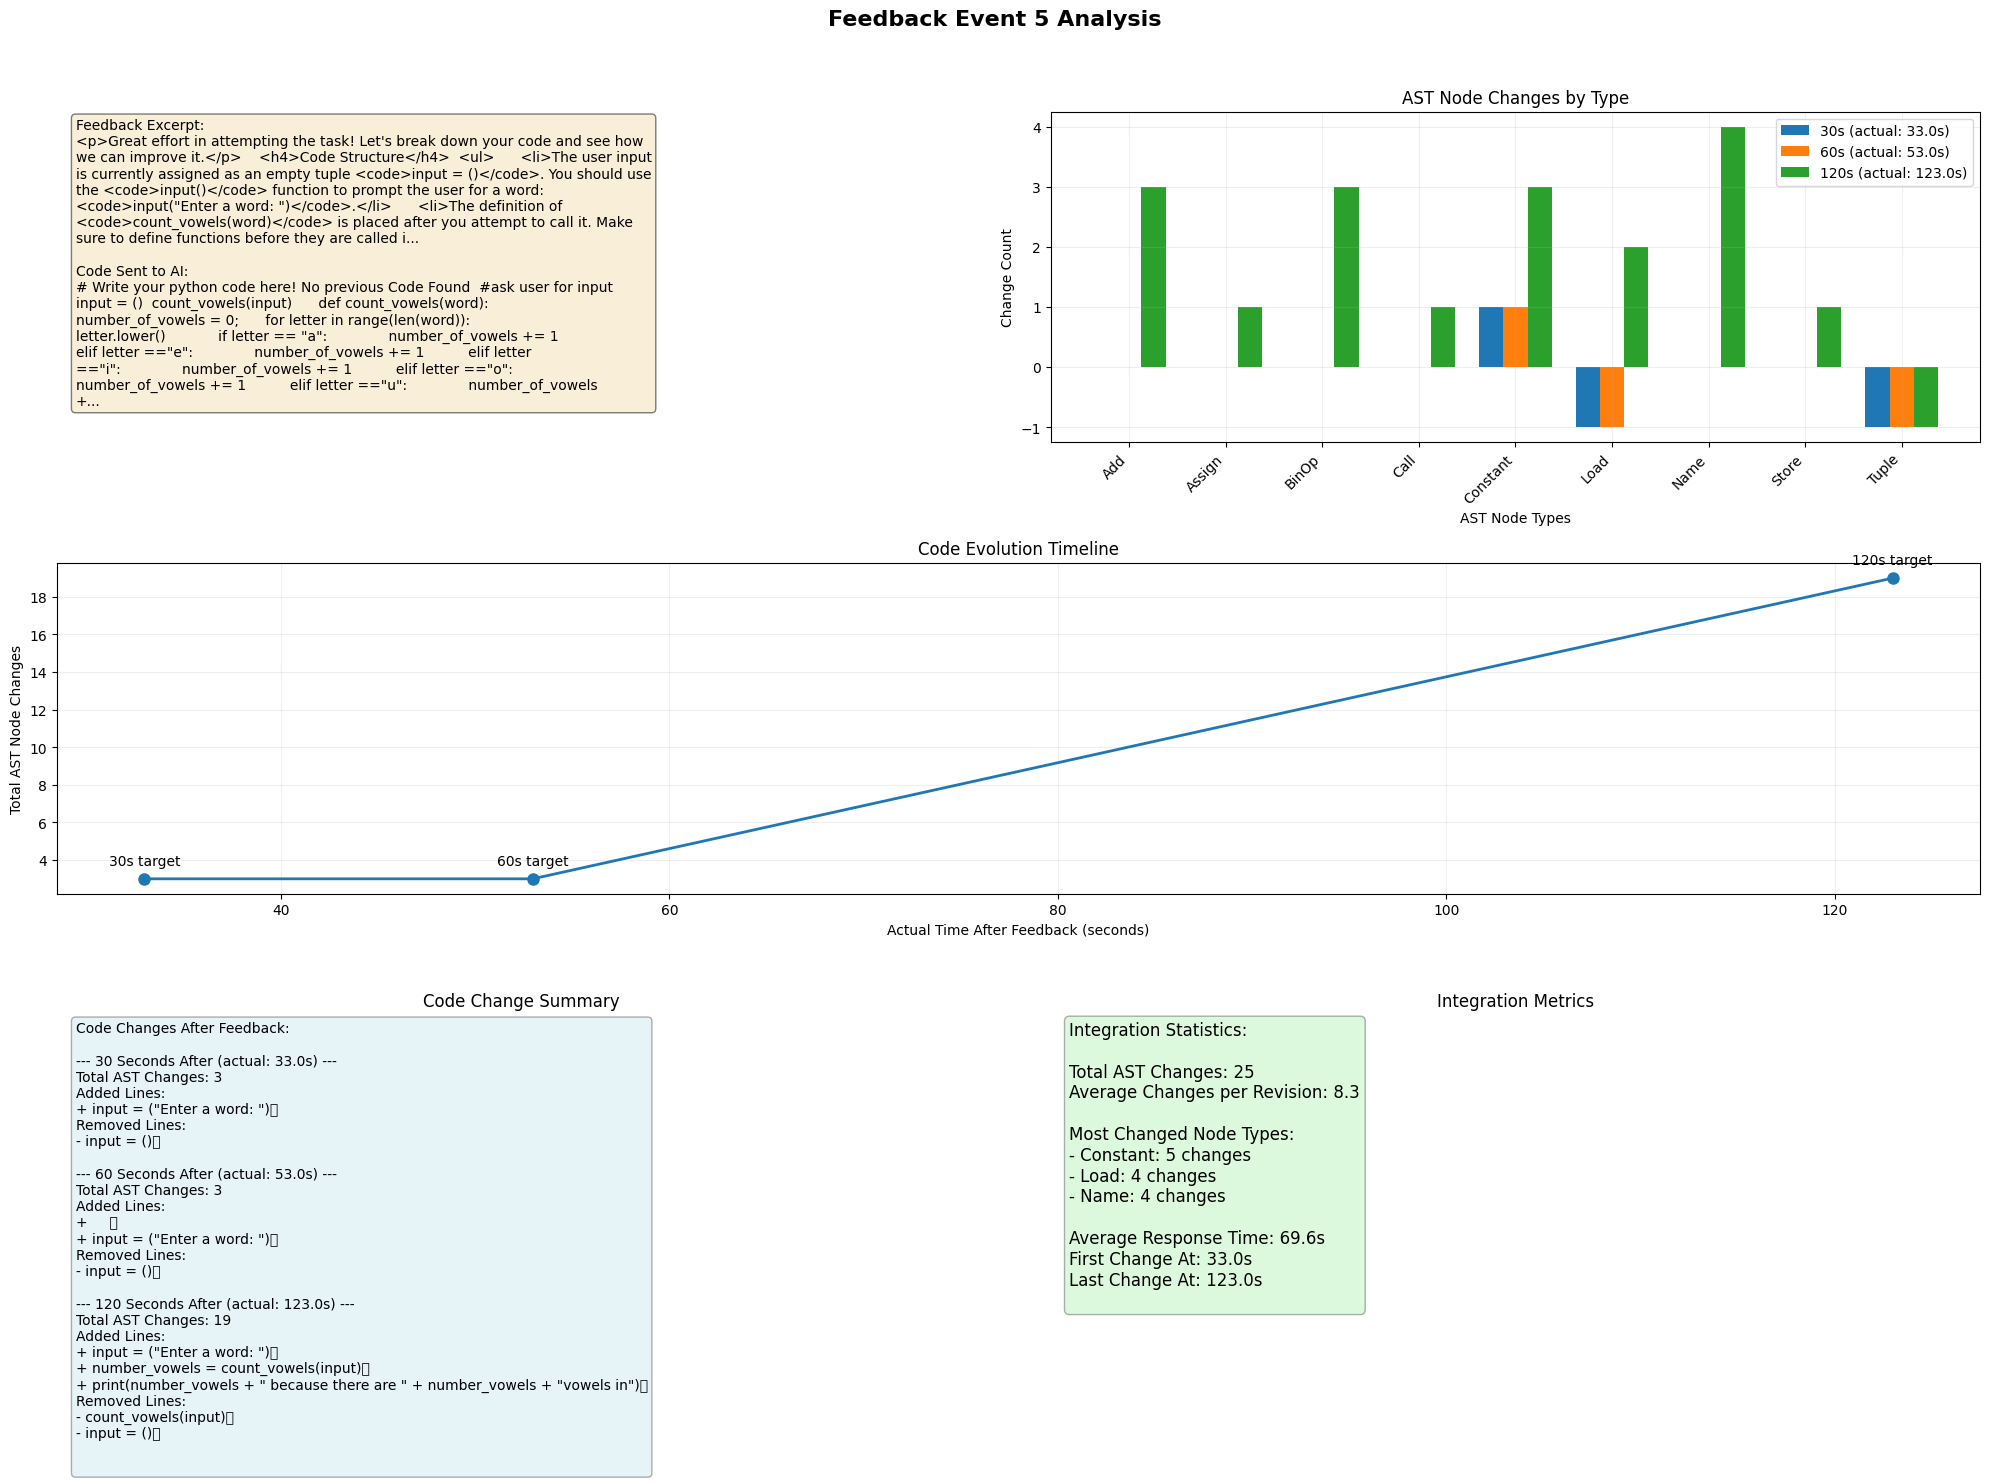

) missing from font(s) DejaVu Sans.pykernel_66128\2637230565.py:204: UserWarning: Glyph 13 (
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
C:\Users\mfawa\AppData\Local\Temp\ipykernel_66128\2637230565.py:204: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
) missing from font(s) DejaVu Sans.hon\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


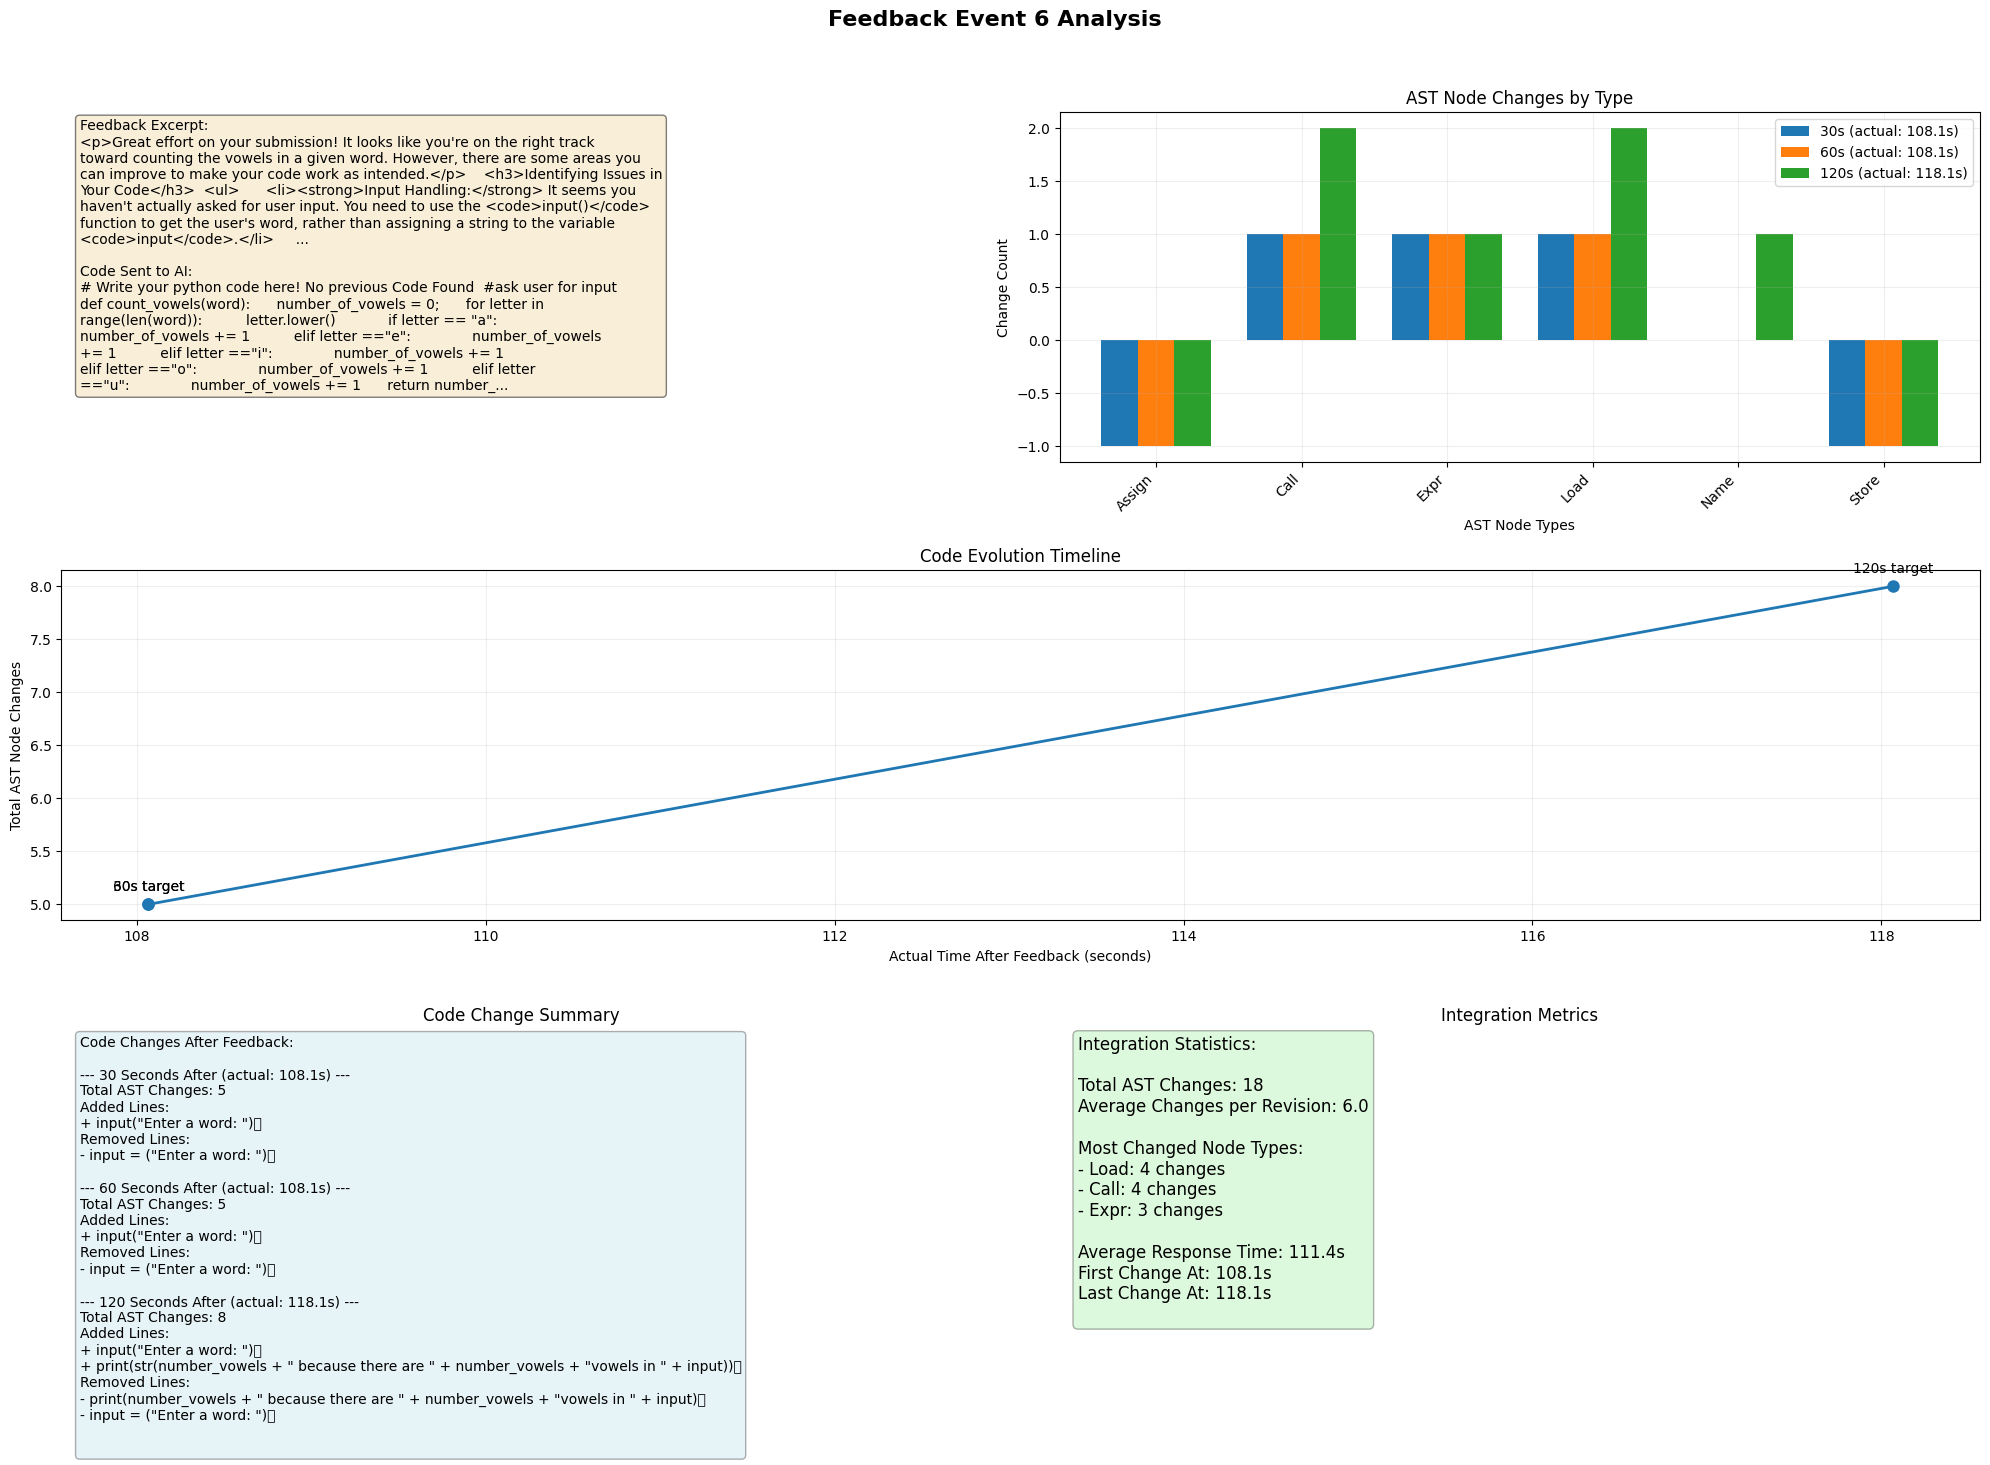

In [ ]:
import ast
import matplotlib.pyplot as plt
import numpy as np
from textwrap import wrap
import matplotlib.gridspec as gridspec

def parse_code_to_ast(code_str):
    try:
        return ast.parse(code_str)
    except Exception:
        return None

def ast_difference(ast_before, ast_after):
    if ast_before is None or ast_after is None:
        return None
    
    nodes_before = Counter(type(n).__name__ for n in ast.walk(ast_before))
    nodes_after = Counter(type(n).__name__ for n in ast.walk(ast_after))
    
    diff = {}
    all_keys = set(nodes_before.keys()) | set(nodes_after.keys())
    for key in all_keys:
        change = nodes_after.get(key, 0) - nodes_before.get(key, 0)
        if change != 0:
            diff[key] = change
    return diff

# Process each feedback event individually
for idx, row in results_df.iterrows():
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15), constrained_layout=True)
    fig.suptitle(f"Feedback Event {idx} Analysis", fontsize=16, fontweight='bold')
    gs = gridspec.GridSpec(3, 2, figure=fig)
    
    # Create subplot positions
    ax1 = fig.add_subplot(gs[0, 0])  # Feedback info
    ax2 = fig.add_subplot(gs[0, 1])  # AST changes by type
    ax3 = fig.add_subplot(gs[1, :])  # Temporal evolution
    ax4 = fig.add_subplot(gs[2, 0])  # Code comparison
    ax5 = fig.add_subplot(gs[2, 1])  # Stats
    
    # Hide axes for text boxes
    ax1.axis('off')
    ax4.axis('off')
    ax5.axis('off')
    
    # --- Panel 1: Feedback Information ---
    feedback = row['ai_feedback_call']['feedback']
    code_sent = row['ai_code_sent']
    
    feedback_summary = "\n".join(wrap(feedback, 80))[:500] + "..." if len(feedback) > 500 else "\n".join(wrap(feedback, 80))
    code_summary = "\n".join(wrap(code_sent, 80))[:500] + "..." if len(code_sent) > 500 else "\n".join(wrap(code_sent, 80))
    
    info_text = (
        f"Feedback Excerpt:\n{feedback_summary}\n\n"
        f"Code Sent to AI:\n{code_summary}"
    )
    ax1.text(0.02, 0.98, info_text, 
             ha='left', va='top', fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # --- Panel 2: AST Changes by Type ---
    base_ast = parse_code_to_ast(row['ai_code_sent'])
    changes_by_delta = {}
    node_types = set()
    
    for delta in [30, 60, 120]:
        code_after = row[f'code_{delta}s']
        if pd.isna(code_after):
            continue
            
        after_ast = parse_code_to_ast(code_after)
        diff = ast_difference(base_ast, after_ast)
        
        if diff:
            changes_by_delta[delta] = diff
            node_types.update(diff.keys())
    
    # Prepare data for bar chart
    node_types = sorted(node_types)
    deltas = sorted(changes_by_delta.keys())
    
    if node_types and deltas:
        bar_width = 0.25
        index = np.arange(len(node_types))
        
        for i, delta in enumerate(deltas):
            values = [changes_by_delta[delta].get(node, 0) for node in node_types]
            ax2.bar(index + i * bar_width, values, bar_width, 
                    label=f'{delta}s (actual: {row[f"time_diff_{delta}s"]:.1f}s)')
        
        ax2.set_xlabel('AST Node Types')
        ax2.set_ylabel('Change Count')
        ax2.set_title('AST Node Changes by Type')
        ax2.set_xticks(index + bar_width * (len(deltas)-1)/2)
        ax2.set_xticklabels(node_types, rotation=45, ha='right')
        ax2.legend()
        ax2.grid(alpha=0.2)
    else:
        ax2.text(0.5, 0.5, 'No AST Changes Detected', 
                 ha='center', va='center', fontsize=14)
        ax2.set_title('AST Node Changes by Type')
    
    # --- Panel 3: Temporal Evolution ---
    if changes_by_delta:
        total_changes = [sum(abs(v) for v in changes_by_delta[delta].values()) 
                         for delta in deltas]
        actual_times = [row[f'time_diff_{delta}s'] for delta in deltas]
        
        # Sort by actual time
        sorted_indices = np.argsort(actual_times)
        sorted_times = [actual_times[i] for i in sorted_indices]
        sorted_changes = [total_changes[i] for i in sorted_indices]
        sorted_deltas = [deltas[i] for i in sorted_indices]
        
        ax3.plot(sorted_times, sorted_changes, 'o-', markersize=8, linewidth=2)
        
        # Annotate points with target delta
        for time, change, delta in zip(sorted_times, sorted_changes, sorted_deltas):
            ax3.annotate(f'{delta}s target', 
                         (time, change),
                         textcoords="offset points", 
                         xytext=(0,10), 
                         ha='center')
        
        ax3.set_xlabel('Actual Time After Feedback (seconds)')
        ax3.set_ylabel('Total AST Node Changes')
        ax3.set_title('Code Evolution Timeline')
        ax3.grid(True, alpha=0.2)
    else:
        ax3.text(0.5, 0.5, 'No Code Changes Detected', 
                 ha='center', va='center', fontsize=14)
        ax3.set_title('Code Evolution Timeline')
    
    # --- Panel 4: Code Comparison ---
    comparison_text = "Code Changes After Feedback:\n\n"
    
    for delta in [30, 60, 120]:
        code_after = row[f'code_{delta}s']
        if pd.isna(code_after):
            continue
            
        # Simple text diff (for visualization purposes)
        before_lines = set(code_sent.split('\n'))
        after_lines = set(code_after.split('\n'))
        
        added = after_lines - before_lines
        removed = before_lines - after_lines
        
        comparison_text += f"--- {delta} Seconds After (actual: {row[f'time_diff_{delta}s']:.1f}s) ---\n"
        comparison_text += f"Total AST Changes: {sum(abs(v) for v in changes_by_delta.get(delta, {}).values())}\n"
        
        if added:
            comparison_text += "Added Lines:\n"
            for line in list(added)[:3]:  # Show first 3 added lines
                comparison_text += f"+ {line}\n"
        
        if removed:
            comparison_text += "Removed Lines:\n"
            for line in list(removed)[:3]:  # Show first 3 removed lines
                comparison_text += f"- {line}\n"
                
        comparison_text += "\n"
    
    ax4.text(0.02, 0.98, comparison_text, 
             ha='left', va='top', fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))
    ax4.set_title('Code Change Summary')
    
    # --- Panel 5: Statistics ---
    stats_text = "Integration Statistics:\n\n"
    
    if changes_by_delta:
        # Calculate change metrics
        total_changes_all = sum(sum(abs(v) for v in diff.values()) for diff in changes_by_delta.values())
        avg_changes = np.mean([sum(abs(v) for v in diff.values()) for diff in changes_by_delta.values()])
        
        stats_text += f"Total AST Changes: {total_changes_all}\n"
        stats_text += f"Average Changes per Revision: {avg_changes:.1f}\n"
        
        # Most changed node types
        all_changes = Counter()
        for diff in changes_by_delta.values():
            for node, change in diff.items():
                all_changes[node] += abs(change)
        
        if all_changes:
            stats_text += "\nMost Changed Node Types:\n"
            for node, count in all_changes.most_common(3):
                stats_text += f"- {node}: {count} changes\n"
    
    # Time metrics
    times = [row[f'time_diff_{delta}s'] for delta in [30, 60, 120] if not pd.isna(row[f'code_{delta}s'])]
    if times:
        stats_text += f"\nAverage Response Time: {np.mean(times):.1f}s\n"
        stats_text += f"First Change At: {min(times):.1f}s\n"
        stats_text += f"Last Change At: {max(times):.1f}s\n"
    
    ax5.text(0.02, 0.98, stats_text, 
             ha='left', va='top', fontsize=12, 
             bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
    ax5.set_title('Integration Metrics')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for suptitle
    plt.show()

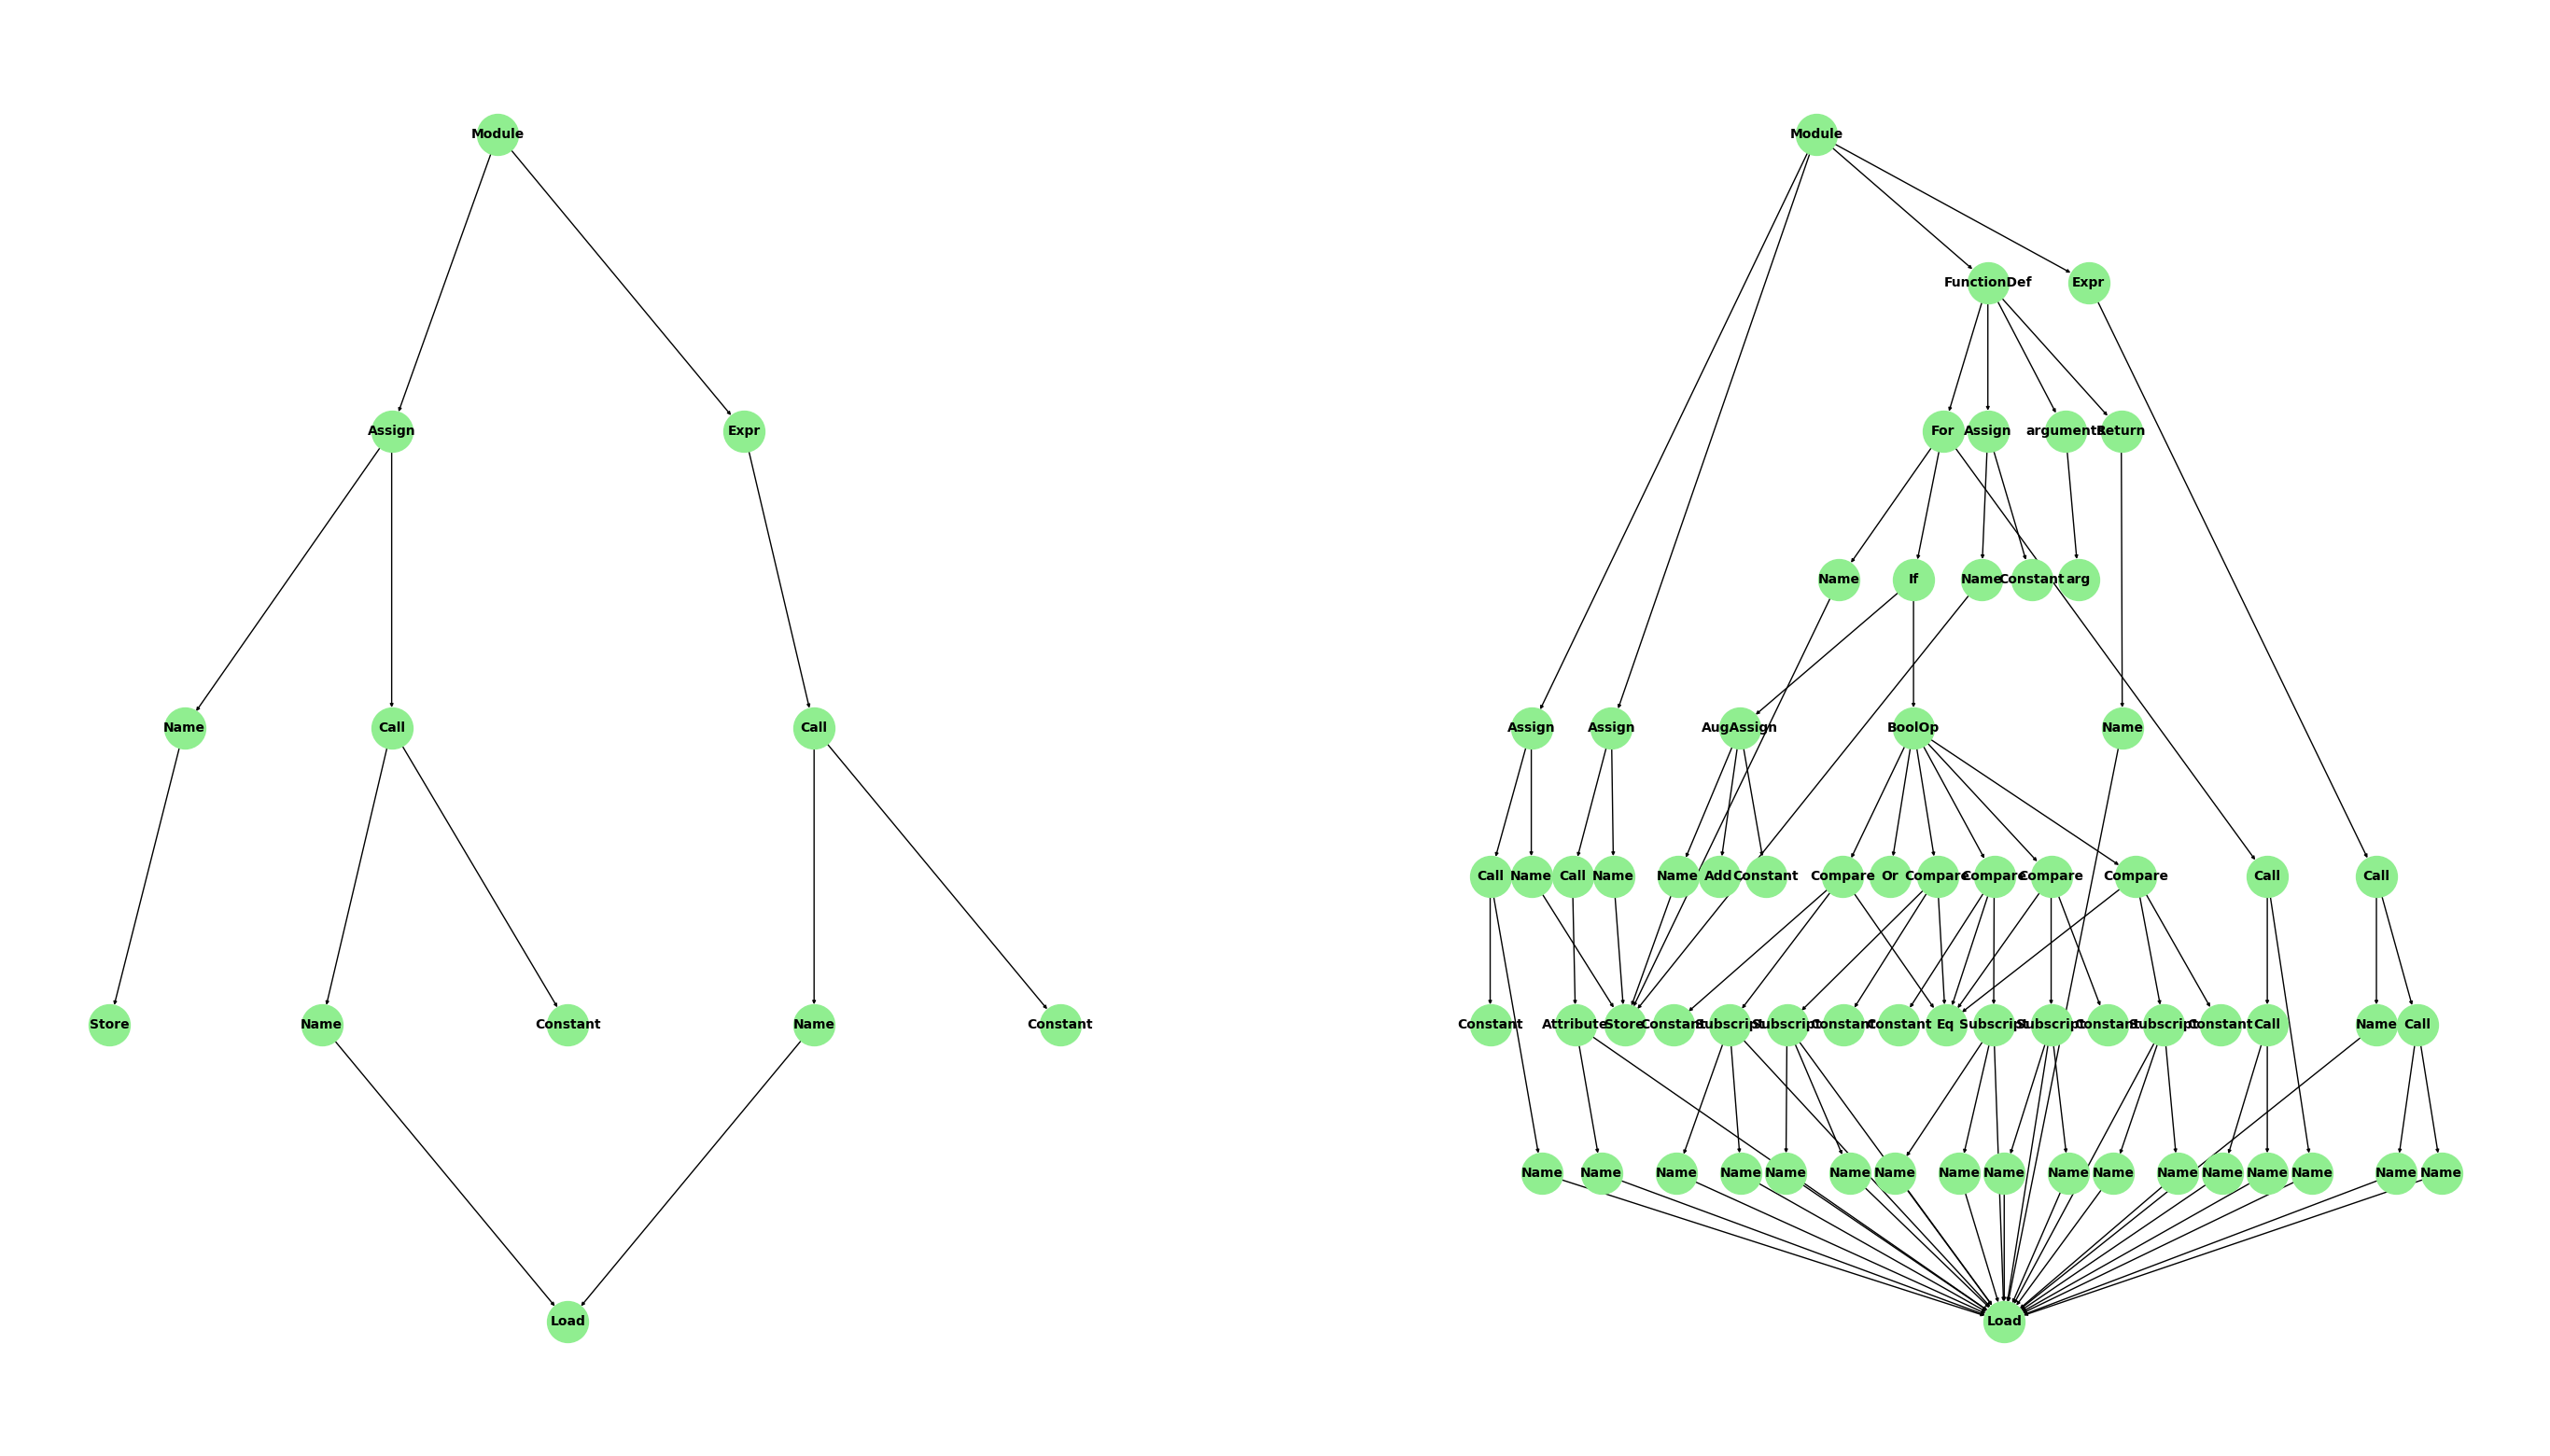

In [ ]:
# Plot the first, middle and last element of parsable_codes in a subplot in 1 by 3 grid
# n = len(parsable_codes)
# indices = [0, n//2, -1]
# selected_codes = [parsable_codes[i] for i in indices]

fig, axs = plt.subplots(1, 2, figsize=(35, 20))

for ax, code in zip(axs, [code_before, code_after]):
    plot_ast(code, ax=ax)
    ax.axis('off')

# plt.tight_layout()
plt.savefig("ast_3_plots.png", dpi=100)

In [ ]:
import ast
from graphviz import Digraph
tree = ast.parse(student_1_codes[8])

# Create a Graphviz Digraph object
dot = Digraph()

# Define a function to recursively add nodes to the Digraph
def add_node(node, parent=None):
    node_name = str(node.__class__.__name__)
    dot.node(str(id(node)), node_name)
    if parent:
        dot.edge(str(id(parent)), str(id(node)))
    for child in ast.iter_child_nodes(node):
        add_node(child, node)

# Add nodes to the Digraph
add_node(tree)

# Render the Digraph as a PNG file
dot.format = 'png'
dot.render('my_ast', view=True)

KeyError: 8

## CODE DUMP

In [ ]:
import ast
import graphviz

def generate_ast_graph(code, filename="ast_graph", file_format="png"):
    """Parses Python code into an AST and generates a graph visualization.

    Args:
        code (str): The Python code to parse.
        filename (str, optional): The name of the output file (without extension). Defaults to "ast_graph".
        file_format (str, optional): The format of the output file (e.g., "png", "pdf", "svg"). Defaults to "png".
    """
    tree = ast.parse(code)
    graph = graphviz.Digraph(comment='Abstract Syntax Tree', format=file_format)
    
    def add_nodes_edges(node, parent_name=None):
        node_name = str(id(node))
        label = type(node).__name__
        if isinstance(node, ast.Name):
            label += f"\\n id='{node.id}'"
        elif isinstance(node, ast.Constant):
            label += f"\\n value='{node.value}'"
        graph.node(node_name, label=label)
        if parent_name:
            graph.edge(parent_name, node_name)

        for child_name, child in ast.iter_fields(node):
            if isinstance(child, list):
                for item in child:
                    if isinstance(item, ast.AST):
                       add_nodes_edges(item, node_name)
            elif isinstance(child, ast.AST):
                add_nodes_edges(child, node_name)

    add_nodes_edges(tree)
    # graph.render(filename, view=False)
    # print(f"AST graph saved to {filename}.{file_format}")
    return graph